In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import libpysal as lps
import esda
import seaborn as sns
from matplotlib import colors
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import grangercausalitytests
import geopandas as gpd

In [3]:
import time
start_time = time.time()

In [4]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
media = pd.read_csv('Nepal/media_coding.csv')
print(f'Dataset loaded with shape: {media.shape}')
media.head()

Dataset loaded with shape: (367, 8)


,CASEQUANTITY,CASEDATE,DISTRICTNAME,VDCMCP,Location,Batch,Observations,Coder
0,6,2002-04-01,Kalikot,NaN,NaN,1,the family of a lawmaker from Kalikot were abd...,KE
1,11,2002-07-01,Solukhumbu,NaN,Nele area of Solukhumbu district,1,NaN,KE
2,8,2002-08-01,bordering Rolpa and Pyuthan districts,NaN,travelling in a bus near Jaluki bordering Rolp...,1,The kidnappers were not identified but they ar...,KE
3,100,2002-09-19,Ramechhap,NaN,Chandeswori school in Ramechhap district,1,"""about 100""",KE
4,5,2002-10-12,Surkhet,NaN,their homes in Surkhet district,1,"maybe took place over 2 days, and may be an ag...",KE


In [6]:
media[media.CASEQUANTITY==max(media.CASEQUANTITY)]

,CASEQUANTITY,CASEDATE,DISTRICTNAME,VDCMCP,Location,Batch,Observations,Coder
59,15000,2004-04-06,Kanchanpur,NaN,"Tribhuvan Basti, Kalipa and Parasa villages in...",1,estimates as high as 2000,KE


In [7]:
media.CASEQUANTITY[media.index==59]=1500
media.head(60).tail(1)

/var/folders/r9/147lb9956w3cl4tl0kktrl3r0000gn/T/ipykernel_79700/2489550068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media.CASEQUANTITY[media.index==59]=1500


,CASEQUANTITY,CASEDATE,DISTRICTNAME,VDCMCP,Location,Batch,Observations,Coder
59,1500,2004-04-06,Kanchanpur,NaN,"Tribhuvan Basti, Kalipa and Parasa villages in...",1,estimates as high as 2000,KE


In [8]:
ngo = pd.read_csv('Nepal/ngo_coding.csv')
print(f'Dataset loaded with shape: {ngo.shape}')
ngo.head()

Dataset loaded with shape: (513, 15)


,CASEQUANTITY,CASEDATE,VICTIMSNAME,AGE,GENDER,DISTRICTNAME,VDCMCP,WARDNO,LOCATIONNO,OCCUPATIONDESCRIPTION,DESIGNATION,KILLINGSTYPE,KILLINGSSUBTYPE,VICTIMSTATUSDESCRIPTION,VICTIMSTATUSSUBDESCRIPTION
0,10,2002-01-04,Student,NaN,NaN,Kailali,Paddon,9.0,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction
1,12,2002-01-23,Unidentified (Student),25.0,Male,Salyan,Shyunrat,4.0,0,Student,Student,By Non-State,Maoists,Abduction,Abduction
2,35,2002-06-15,Unidentified,NaN,NaN,Jumla,Depalgaun,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction
3,20,2002-07-12,Unidentifed,NaN,NaN,Jumla,Narakot,5.0,0,Student,Student,By Non-State,Maoists,Abduction,Abduction
4,22,2002-07-16,Unidentified,NaN,NaN,Jumla,Kanaka Sundari,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction


In [9]:
print(ngo.CASEQUANTITY.shape)
print(ngo.CASEQUANTITY.mean())
print(ngo.CASEQUANTITY.median())

(513,)
144.16569200779728
30.0


In [10]:
print(media.CASEQUANTITY.shape)
print(media.CASEQUANTITY.sum())
print(media.CASEQUANTITY.mean())
print(media.CASEQUANTITY.median())

(367,)
56899
155.03814713896458
40.0


In [11]:
ngo.CASEDATE.max()

'2007-03-01'

In [12]:
# Extract week numbers, month numbers and years from data
ngo['year']=pd.to_datetime(ngo.CASEDATE).dt.year
ngo['month']=pd.to_datetime(ngo.CASEDATE).dt.month
ngo['week']=pd.to_datetime(ngo.CASEDATE).dt.week
ngo = ngo[ngo.year<2007]

media['year']=pd.to_datetime(media.CASEDATE).dt.year
media['month']=pd.to_datetime(media.CASEDATE).dt.month
media['week']=pd.to_datetime(media.CASEDATE).dt.week

# Create a unique week ID for each calendar week from 2002-01-01 to 2007-12-31 
ngo['weekid']=((ngo.year-2002))*53+ngo.week
media['weekid']=((media.year-2002)*53)+media.week

ngo['monthid']=((ngo.year-2002))*12+ngo.month
media['monthid']=((media.year-2002)*12)+media.month

/var/folders/r9/147lb9956w3cl4tl0kktrl3r0000gn/T/ipykernel_79700/497097800.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ngo['week']=pd.to_datetime(ngo.CASEDATE).dt.week
/var/folders/r9/147lb9956w3cl4tl0kktrl3r0000gn/T/ipykernel_79700/497097800.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  media['week']=pd.to_datetime(media.CASEDATE).dt.week


In [13]:
ngo[['week','year','weekid','monthid']]

,week,year,weekid,monthid
0,1,2002,1,1
1,4,2002,4,1
2,24,2002,24,6
3,28,2002,28,7
4,29,2002,29,7
...,...,...,...,...
507,46,2006,258,59
508,46,2006,258,59
509,46,2006,258,59
510,46,2006,258,59


In [14]:
print("Media Data Span:",media.year.min(),'/',media.weekid.min(),'  TO  ',media.year.max(),'/',media.weekid.max())
print("NGO Data Span:",ngo.year.min(),'/',ngo.weekid.min(),'  TO  ',ngo.year.max(),'/',ngo.weekid.max())

Media Data Span: 2002 / 14   TO   2006 / 262
NGO Data Span: 2002 / 1   TO   2006 / 263


# Figure 1 is generated manually (it's a conceptual schematic)

In [15]:
media

,CASEQUANTITY,CASEDATE,DISTRICTNAME,VDCMCP,Location,Batch,Observations,Coder,year,month,week,weekid,monthid
0,6,2002-04-01,Kalikot,NaN,NaN,1,the family of a lawmaker from Kalikot were abd...,KE,2002,4,14,14,4
1,11,2002-07-01,Solukhumbu,NaN,Nele area of Solukhumbu district,1,NaN,KE,2002,7,27,27,7
2,8,2002-08-01,bordering Rolpa and Pyuthan districts,NaN,travelling in a bus near Jaluki bordering Rolp...,1,The kidnappers were not identified but they ar...,KE,2002,8,31,31,8
3,100,2002-09-19,Ramechhap,NaN,Chandeswori school in Ramechhap district,1,"""about 100""",KE,2002,9,38,38,9
4,5,2002-10-12,Surkhet,NaN,their homes in Surkhet district,1,"maybe took place over 2 days, and may be an ag...",KE,2002,10,41,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,33,2006-11-16,Dhading,NaN,NaN,4,summary (over 70 in the past days) in Dhading,MC,2006,11,46,258,59
363,500,2006-11-18,Banke,NaN,NaN,4,NaN,MC,2006,11,46,258,59
364,36,2006-11-18,Rautahat,NaN,Chandranigahpur,4,"unclear date, this is their release date",MC,2006,11,46,258,59
365,11,2006-11-22,Chitwan,NaN,"Ratnagar, Madi, Darechok",4,recruitment,MC,2006,11,47,259,59


In [16]:
ngo

,CASEQUANTITY,CASEDATE,VICTIMSNAME,AGE,GENDER,DISTRICTNAME,VDCMCP,WARDNO,LOCATIONNO,OCCUPATIONDESCRIPTION,DESIGNATION,KILLINGSTYPE,KILLINGSSUBTYPE,VICTIMSTATUSDESCRIPTION,VICTIMSTATUSSUBDESCRIPTION,year,month,week,weekid,monthid
0,10,2002-01-04,Student,NaN,NaN,Kailali,Paddon,9.0,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2002,1,1,1,1
1,12,2002-01-23,Unidentified (Student),25.0,Male,Salyan,Shyunrat,4.0,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,1,4,4,1
2,35,2002-06-15,Unidentified,NaN,NaN,Jumla,Depalgaun,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,6,24,24,6
3,20,2002-07-12,Unidentifed,NaN,NaN,Jumla,Narakot,5.0,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,7,28,28,7
4,22,2002-07-16,Unidentified,NaN,NaN,Jumla,Kanaka Sundari,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,7,29,29,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,71,2006-11-16,Unidentified,NaN,NaN,Lamjung,,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59
508,12,2006-11-17,Unidentified,NaN,Male,Kaski,,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59
509,400,2006-11-18,Unidentified Children,NaN,NaN,Parsa,Birwaguthi,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59
510,400,2006-11-18,Unidentified Children,NaN,NaN,Parsa,Birwaguthi,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59


# Weekly Time Series

In [17]:
ngo_week = ngo.groupby('weekid', as_index=False)\
.agg({"CASEQUANTITY": "sum","CASEDATE":"count"})\
.rename(columns={"CASEQUANTITY":'ngo_abductions',"CASEDATE":'ngo_events'})

media_week = media.groupby('weekid', as_index=False)\
.agg({"CASEQUANTITY": "sum","CASEDATE":"count"})\
.rename(columns={"CASEQUANTITY":'media_abductions',"CASEDATE":'media_events'})

In [18]:
scaffold = pd.DataFrame(list(range(1,264)),columns=['weekid'])
scaffold = scaffold.merge(ngo_week, on='weekid', how='left')
scaffold = scaffold.merge(media_week, on='weekid', how='left')
weekly = scaffold.fillna(0).astype('int32')
weekly

,weekid,ngo_abductions,ngo_events,media_abductions,media_events
0,1,10,1,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,12,1,0,0
4,5,0,0,0,0
...,...,...,...,...,...
258,259,0,0,11,1
259,260,0,0,0,0
260,261,0,0,0,0
261,262,0,0,13,1


In [19]:
plt.rcParams['figure.figsize'] = [15, 15]
#weekly[['ngo_abductions','media_abductions']].plot()

In [20]:
weekly

,weekid,ngo_abductions,ngo_events,media_abductions,media_events
0,1,10,1,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,12,1,0,0
4,5,0,0,0,0
...,...,...,...,...,...
258,259,0,0,11,1
259,260,0,0,0,0
260,261,0,0,0,0
261,262,0,0,13,1


In [21]:
plt.rcParams['figure.figsize'] = [15, 15]
w=weekly[['ngo_events','media_events']]

<AxesSubplot:>

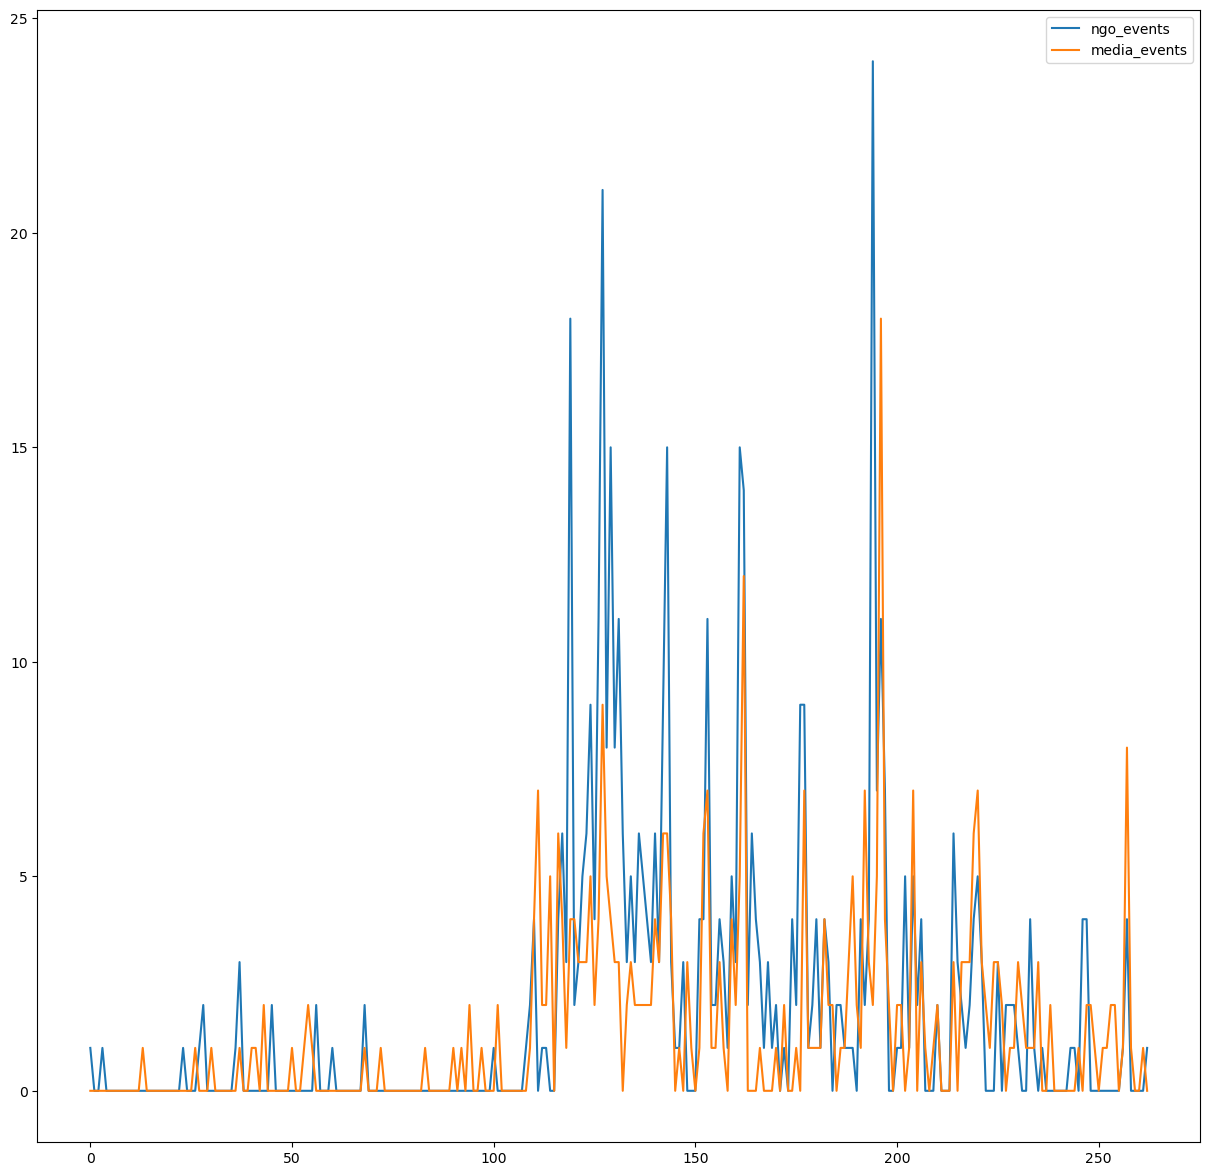

In [22]:
w.plot()

<AxesSubplot:>

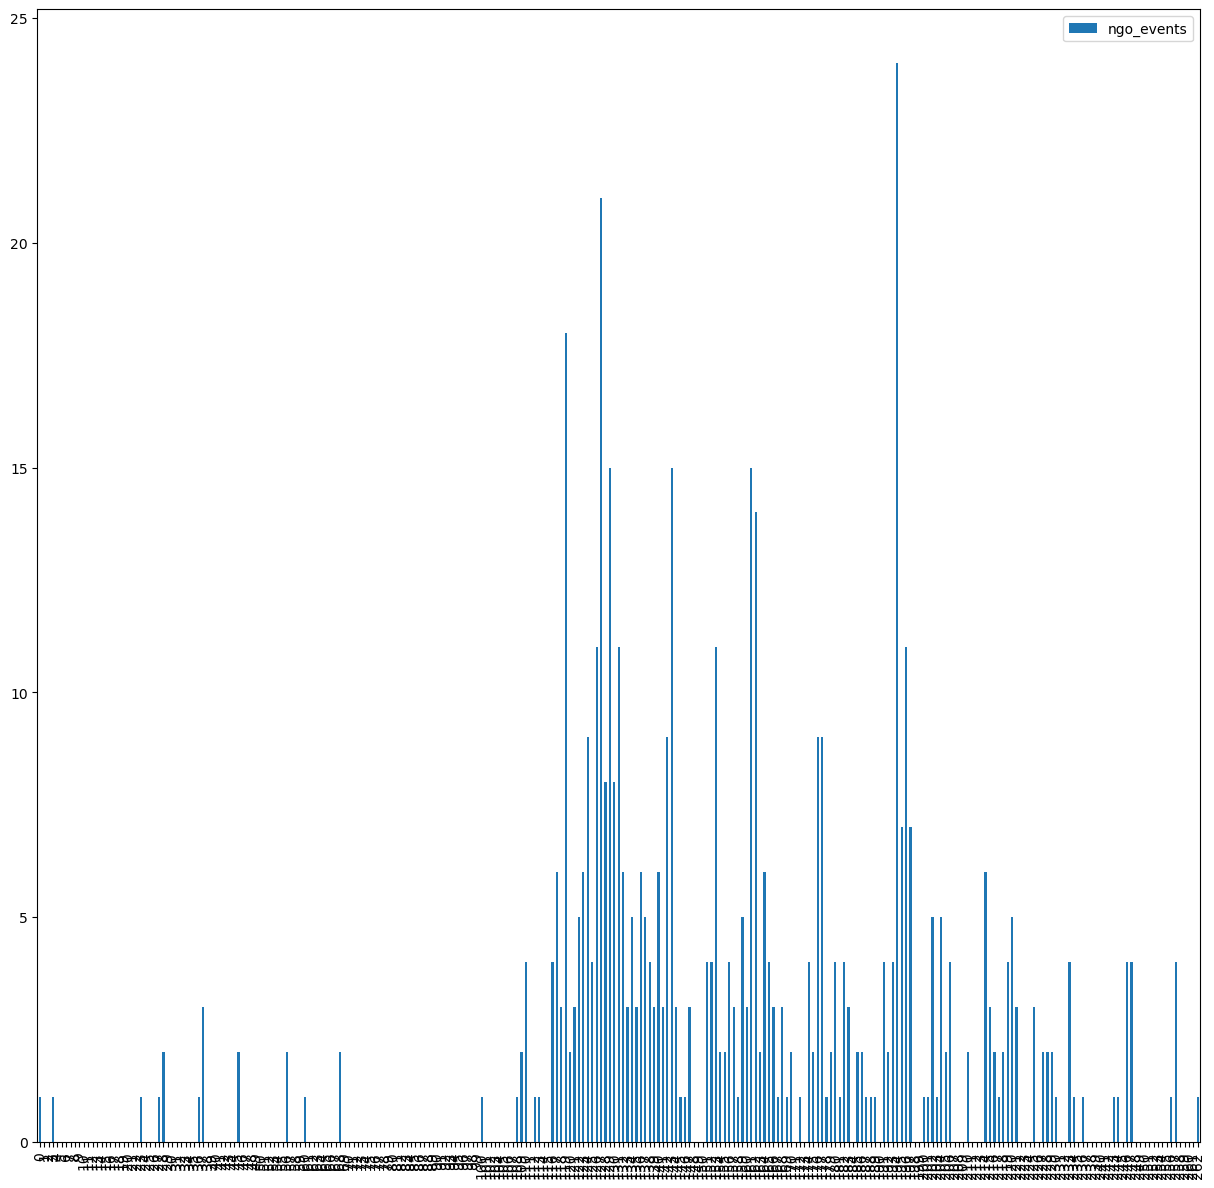

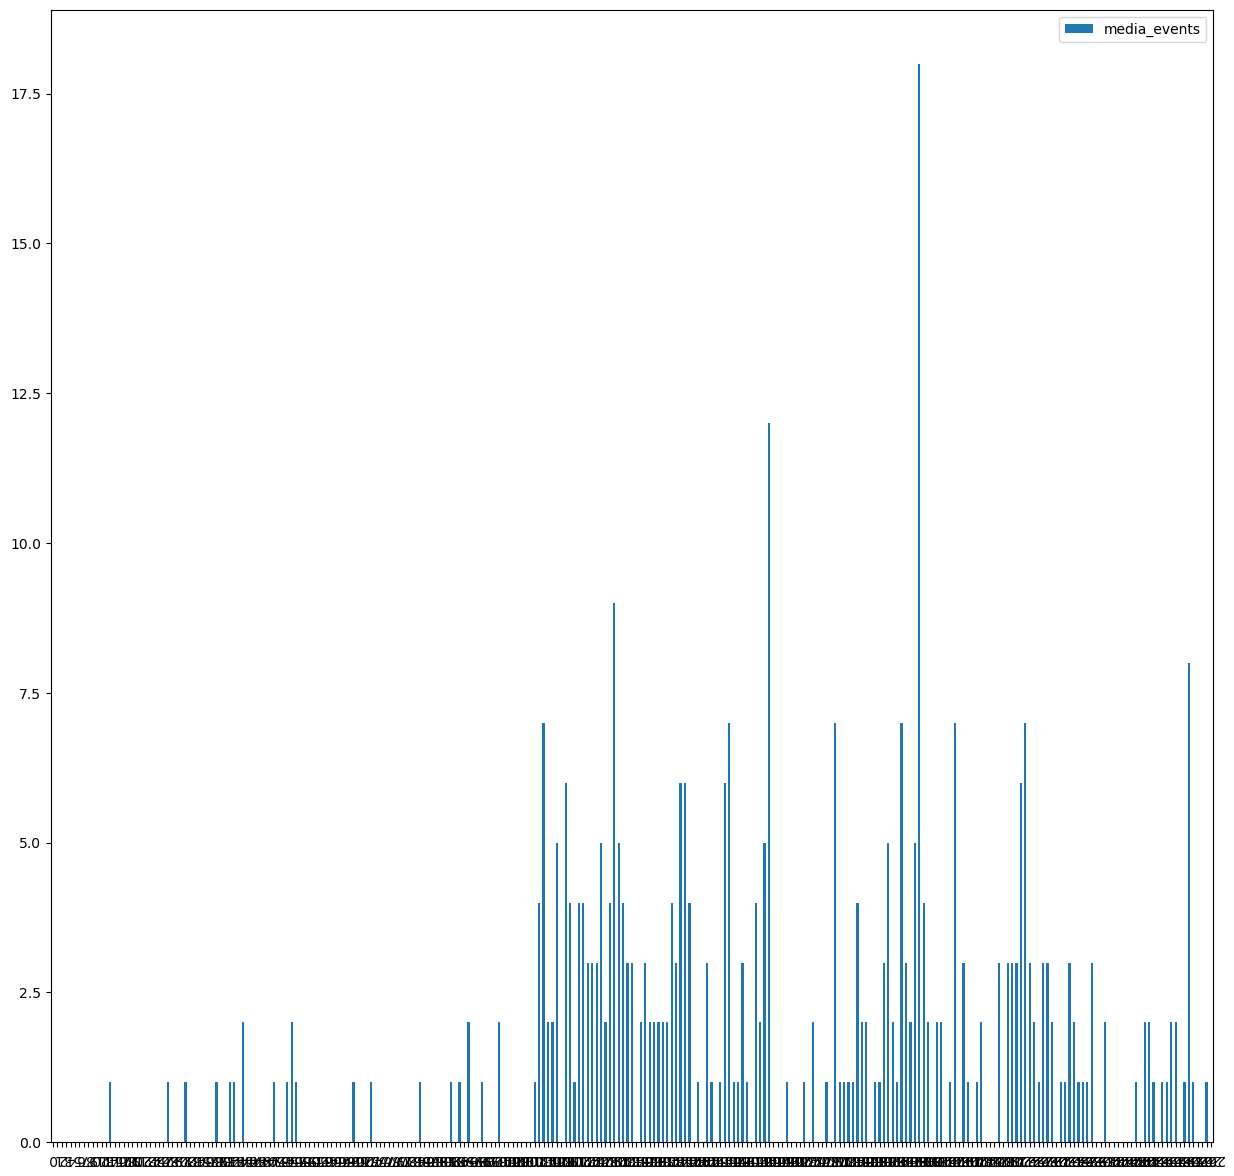

In [23]:
plt.rcParams['figure.figsize'] = [15, 15]
weekly[['ngo_events']].plot.bar()
weekly[['media_events']].plot.bar(rot=180)

In [24]:
weekly['zero']=0
weekly['abductions_delta'] = weekly['ngo_abductions']-weekly['media_abductions']
weekly['events_delta'] = weekly['ngo_events']-weekly['media_events']
weekly['log_abductions_delta'] = np.log10(weekly['ngo_abductions']+1)-np.log10(weekly['media_abductions']+1)

<AxesSubplot:>

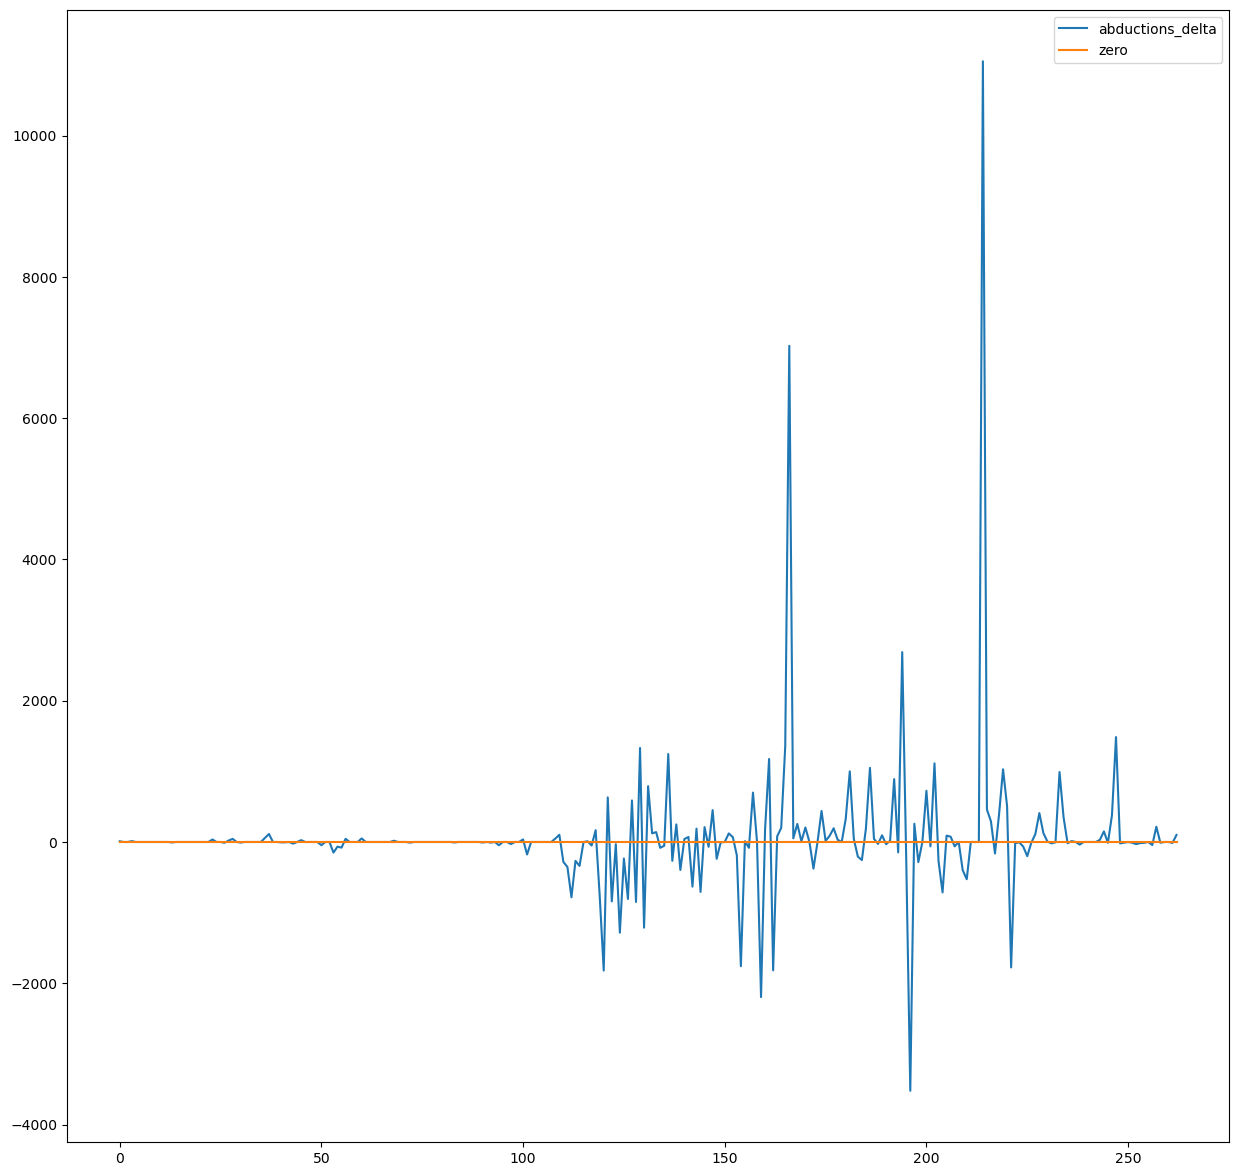

In [25]:
#Above blue line, NGO over-report in terms of count. Below, NGO under-report.
weekly[['abductions_delta','zero']].plot()


<AxesSubplot:>

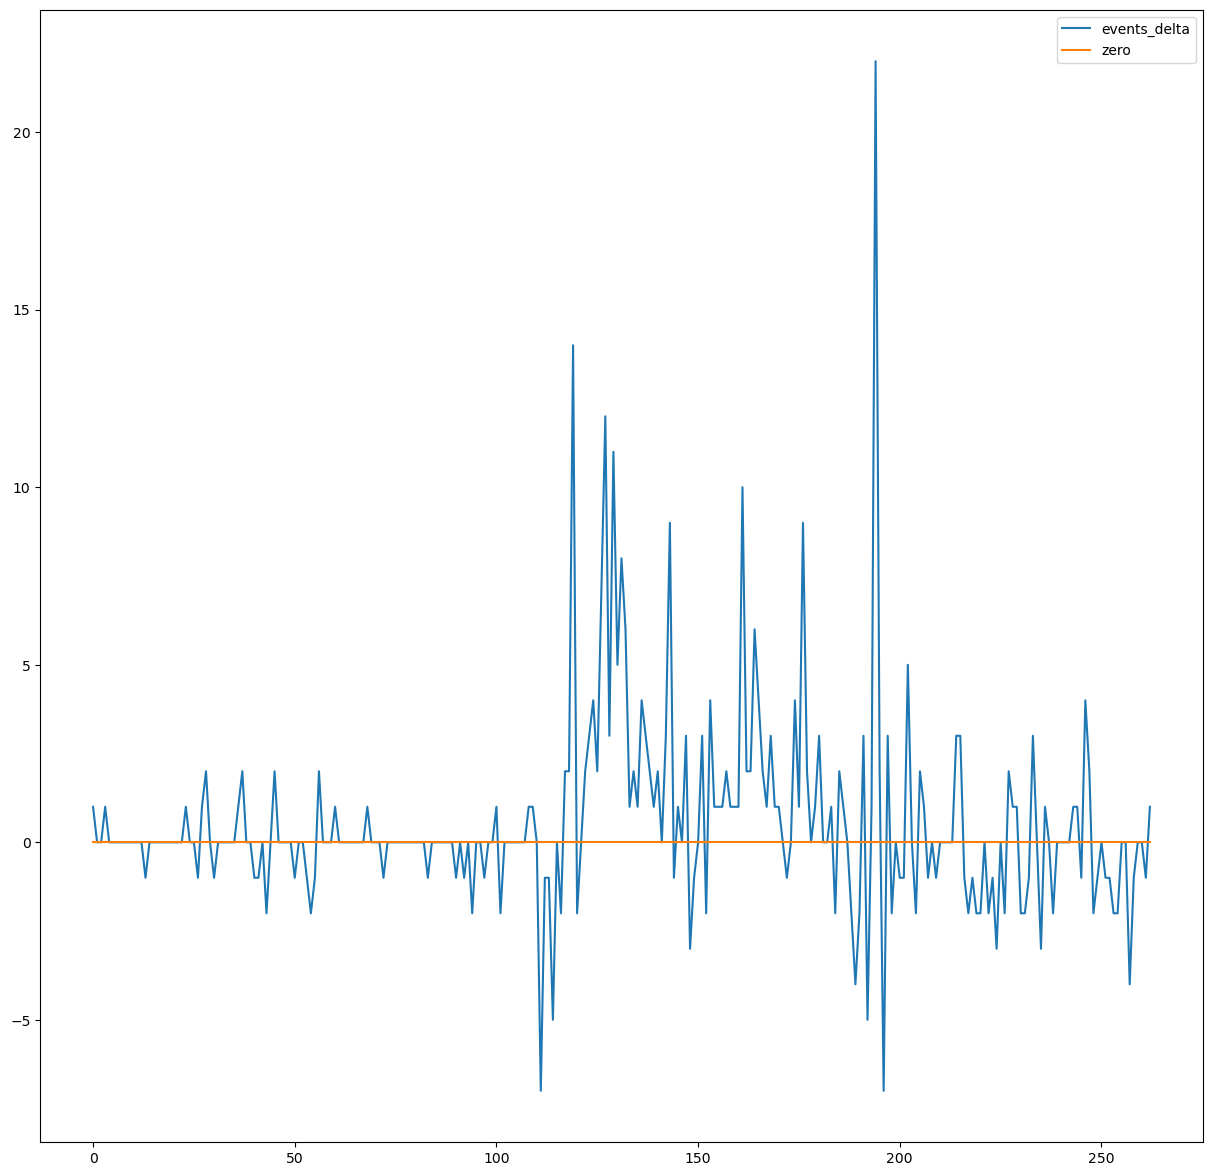

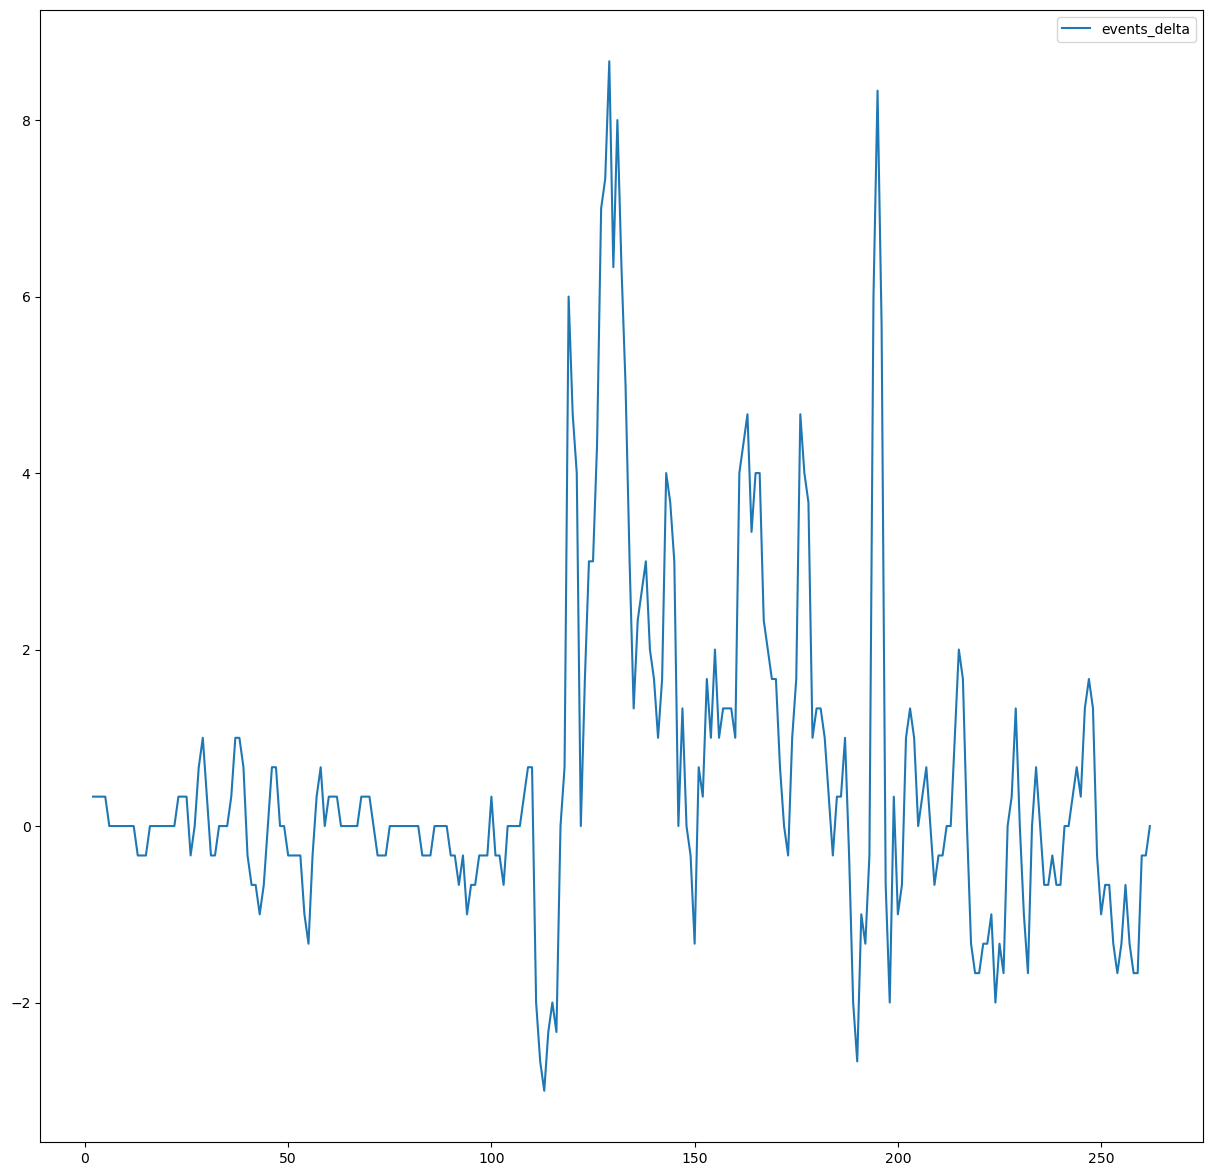

In [26]:
weekly[['events_delta','zero']].plot()
weekly[['events_delta']].rolling(window=3).mean().plot()

<AxesSubplot:>

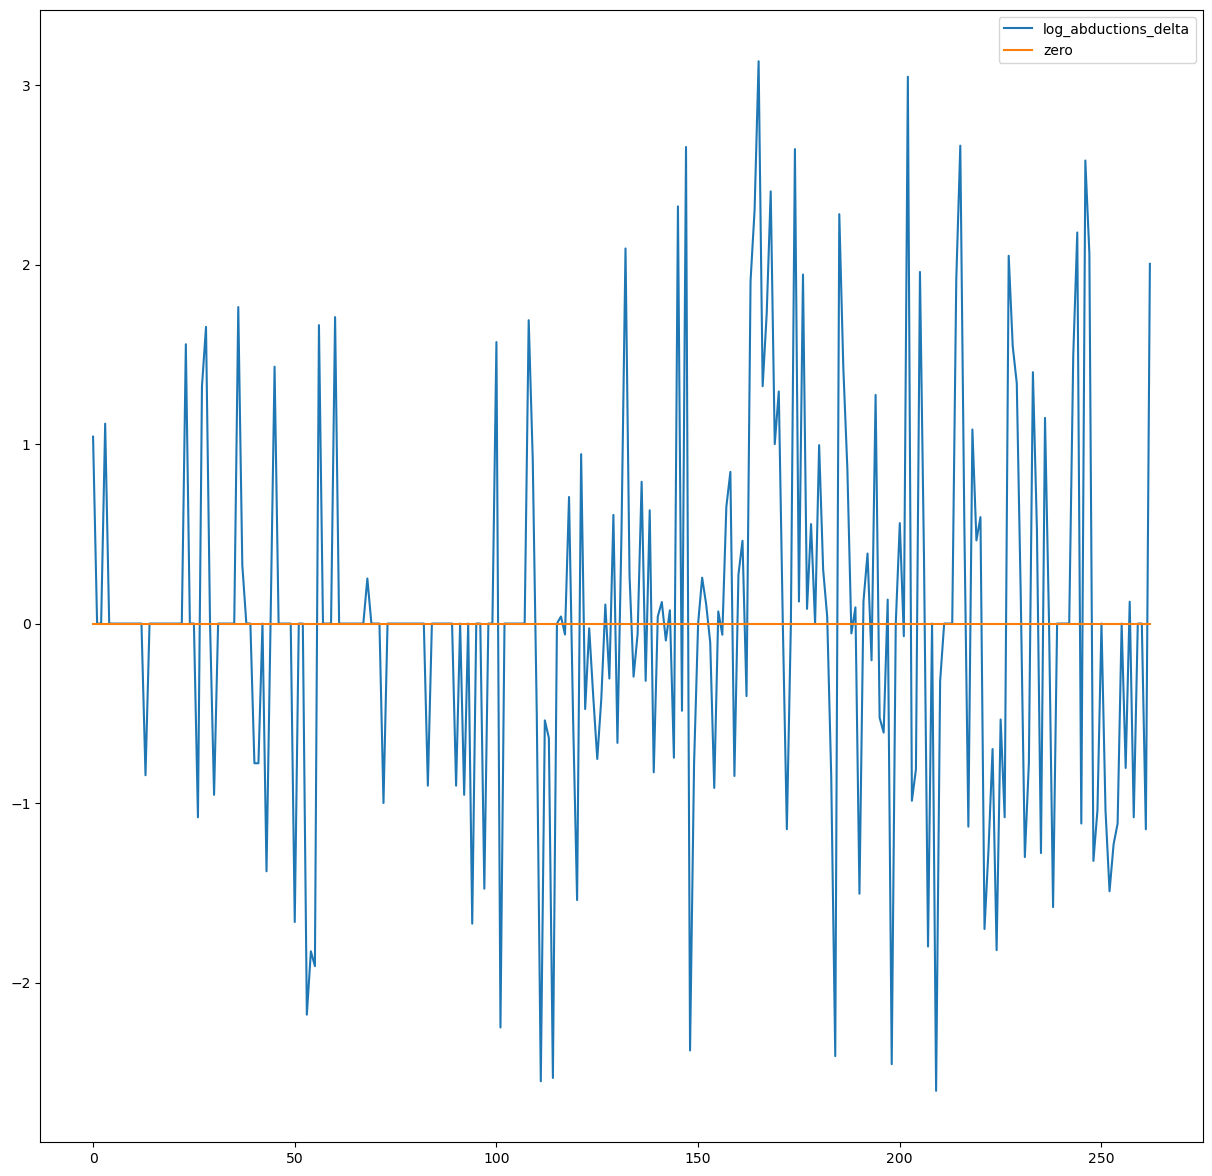

In [27]:
#Above blue line, NGO over-report in terms of abductions count. Below, NGO under-report.
weekly[['log_abductions_delta','zero']].plot()

<AxesSubplot:>

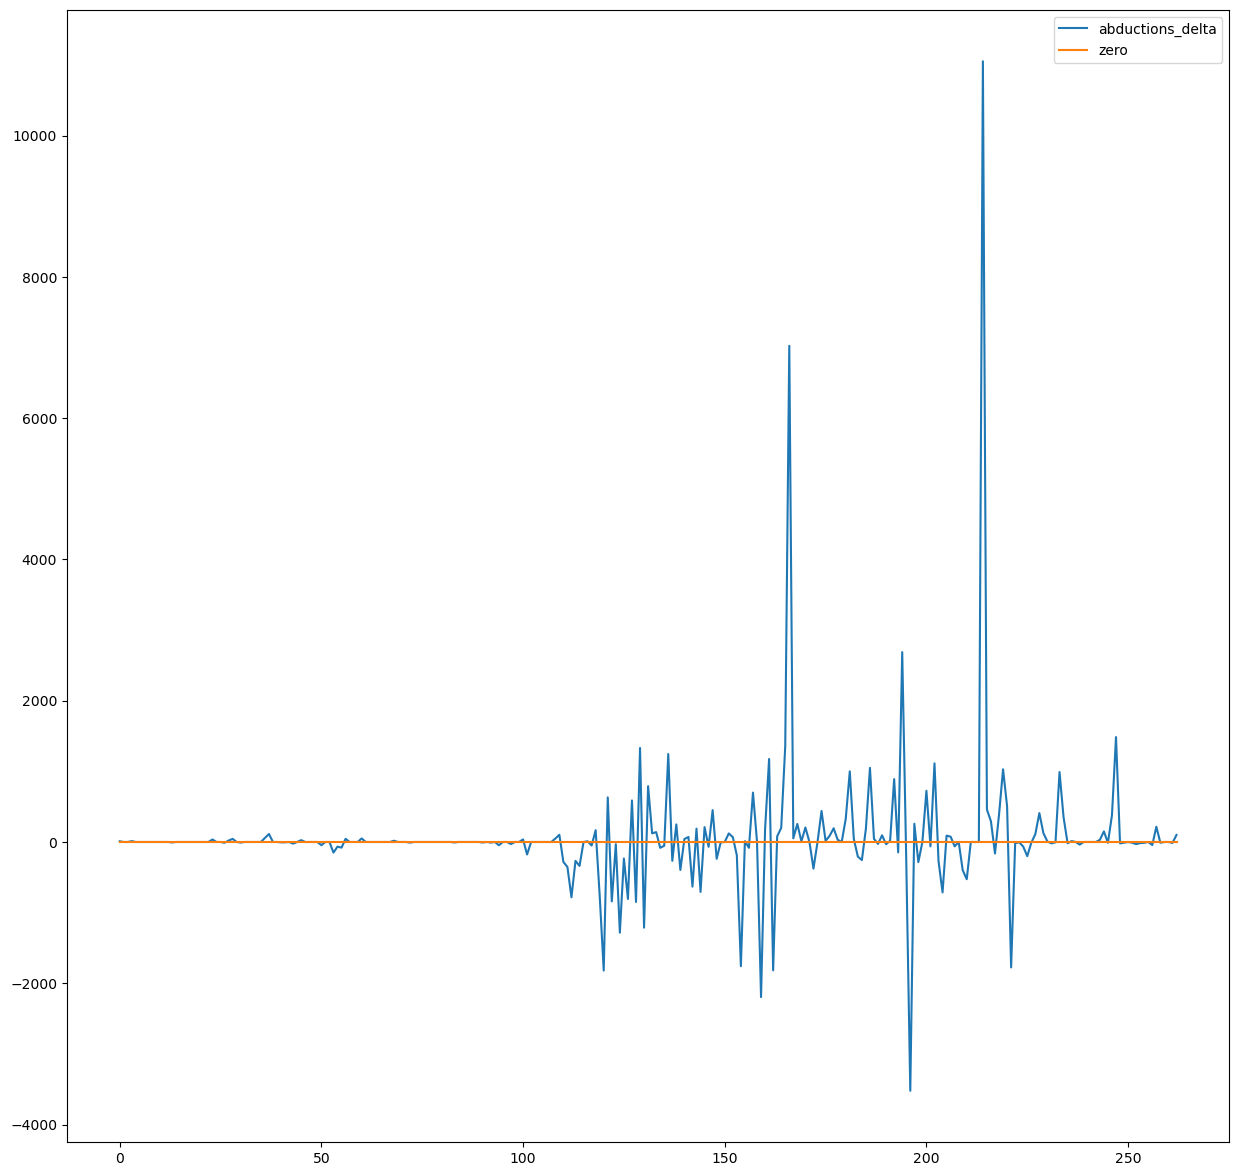

In [28]:
weekly[['abductions_delta','zero']].plot()

In [29]:
weeks = list(weekly.sort_values(by='abductions_delta').head(1).weekid)
media[media['weekid'].isin(weeks)]

,CASEQUANTITY,CASEDATE,DISTRICTNAME,VDCMCP,Location,Batch,Observations,Coder,year,month,week,weekid,monthid
247,12,2005-09-19,Ramechhap,NaN,Tamakoshi Janajagrit Higher Secondary School a...,3,NaN,KE,2005,9,38,197,45
248,400,2005-09-20,"Dandeldhura, Kalikot",NaN,Dadeldhura district's Gaura village; Raskot vi...,3,NaN,KE,2005,9,38,197,45
249,80,2005-09-20,Doti,NaN,NaN,3,NaN,KE,2005,9,38,197,45
250,24,2005-09-20,Dolakha,NaN,NaN,3,NaN,KE,2005,9,38,197,45
251,36,2005-09-19,Morang,NaN,Kerabari village of Morang district,3,NaN,KE,2005,9,38,197,45
252,5,2005-09-19,Kailali,NaN,Godavari in Kailali district,3,NaN,KE,2005,9,38,197,45
253,60,2005-09-21,Dolpa,NaN,Saraswati Secondary School in Dolpa district,3,NaN,KE,2005,9,38,197,45
254,2000,2005-09-21,Achham,NaN,abducted students and teachers of 30 schools l...,3,over the past week. Estimates range 750-2000,KE,2005,9,38,197,45
255,1000,2005-09-21,Baitadi,NaN,from almost all the schools of Baitadi distric...,3,NaN,KE,2005,9,38,197,45
256,24,2005-09-23,Pyuthan,NaN,NaN,3,estimates 18 & 24,KE,2005,9,38,197,45


In [30]:
ngo[ngo['weekid'].isin([195,196,197])]

,CASEQUANTITY,CASEDATE,VICTIMSNAME,AGE,GENDER,DISTRICTNAME,VDCMCP,WARDNO,LOCATIONNO,OCCUPATIONDESCRIPTION,DESIGNATION,KILLINGSTYPE,KILLINGSSUBTYPE,VICTIMSTATUSDESCRIPTION,VICTIMSTATUSSUBDESCRIPTION,year,month,week,weekid,monthid
384,13,2005-09-05,Unidentified,NaN,NaN,Bajura,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
385,124,2005-09-06,Unidentified Students,NaN,NaN,Bajura,Bhanudaya U.MaVi,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
386,93,2005-09-06,Unidentified,NaN,Male,Bajura,,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
387,31,2005-09-06,Unidentified,NaN,Female,Bajura,,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
388,20,2005-09-06,No Name,NaN,NaN,Taplejung,NaN,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
389,17,2005-09-08,Unidentified,NaN,NaN,Dadeldhura,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
390,2000,2005-09-08,Unidentified,NaN,NaN,Taplejung,NaN,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
391,10,2005-09-08,Unidentified,NaN,NaN,Bajura,NaN,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
392,190,2005-09-09,Unidentified,NaN,NaN,Dadeldhura,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45
393,17,2005-09-10,Unidentified,NaN,NaN,Bajura,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,9,36,195,45


In [31]:
weekly.sort_values(by='abductions_delta')

,weekid,ngo_abductions,ngo_events,media_abductions,media_events,zero,abductions_delta,events_delta,log_abductions_delta
196,197,1154,11,4676,18,0,-3522,-7,-0.607385
159,160,361,5,2557,4,0,-2196,1,-0.849192
120,121,53,2,1873,4,0,-1820,-2,-1.540376
162,163,1183,14,3000,12,0,-1817,2,-0.403914
221,222,35,3,1811,3,0,-1776,0,-1.701856
...,...,...,...,...,...,...,...,...,...
165,166,1357,4,0,0,0,1357,4,3.132900
247,248,1497,4,12,2,0,1485,2,2.061568
194,195,2837,24,150,2,0,2687,22,1.274035
166,167,7373,3,350,1,0,7023,2,1.322396


<AxesSubplot:>

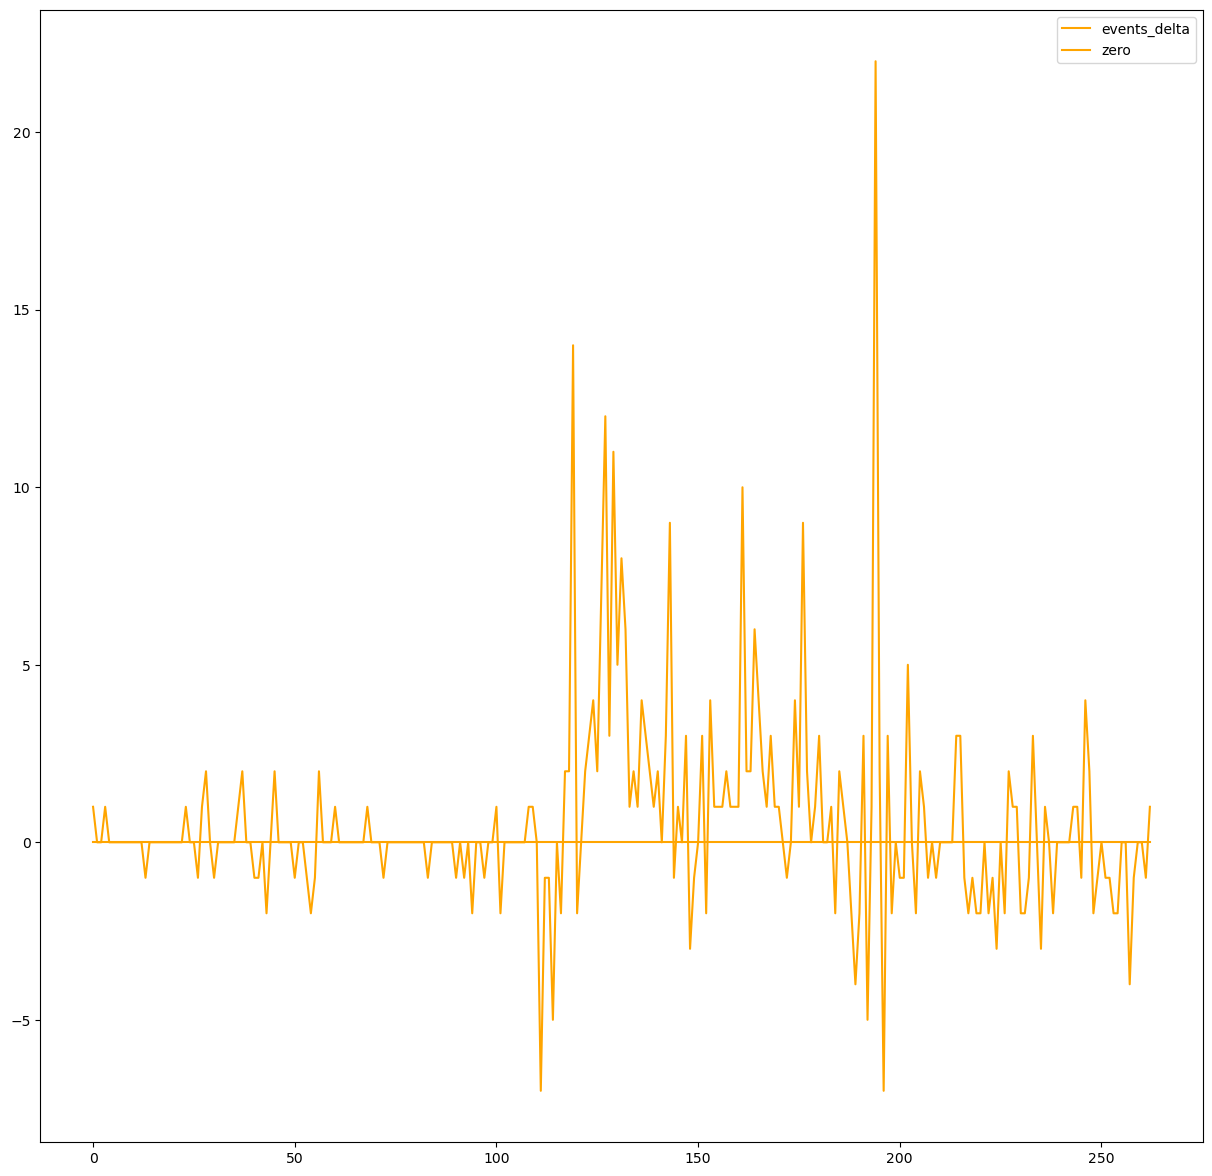

In [32]:
#Above blue line, NGO over-report in terms of count. Below, NGO under-report.
weekly[['events_delta','zero']].plot(color='orange')

In [33]:
ngo[ngo.monthid==44]

,CASEQUANTITY,CASEDATE,VICTIMSNAME,AGE,GENDER,DISTRICTNAME,VDCMCP,WARDNO,LOCATIONNO,OCCUPATIONDESCRIPTION,DESIGNATION,KILLINGSTYPE,KILLINGSSUBTYPE,VICTIMSTATUSDESCRIPTION,VICTIMSTATUSSUBDESCRIPTION,year,month,week,weekid,monthid
373,500,2005-08-05,No Name,NaN,NaN,Taplejung,,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,31,190,44
374,22,2005-08-17,Unidentified,NaN,NaN,Okhaldhunga,,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2005,8,33,192,44
375,16,2005-08-17,Unidentified Students,NaN,NaN,Okhaldhunga,Baruneshwor,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,33,192,44
376,15,2005-08-17,Unidentified,NaN,NaN,Okhaldhunga,,NaN,0,Teacher,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,33,192,44
377,14,2005-08-17,Unidentified Teachers Students,NaN,NaN,Okhaldhunga,Bigutar,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,33,192,44
378,700,2005-08-28,Unidentified,NaN,NaN,Taplejung,NaN,NaN,0,Teacher,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,34,193,44
379,800,2005-08-28,NO Name,NaN,NaN,Taplejung,,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,34,193,44
380,200,2005-08-29,Unidentified,NaN,NaN,Gulmi,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,35,194,44
381,24,2005-08-31,Unidentified,NaN,NaN,Sindhupalchowk,,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,8,35,194,44


In [34]:
weekly.sort_values('events_delta').tail()

,weekid,ngo_abductions,ngo_events,media_abductions,media_events,zero,abductions_delta,events_delta,log_abductions_delta
161,162,1795,15,620,5,0,1175,10,0.461215
129,130,1769,15,438,4,0,1331,11,0.605509
127,128,2710,21,2122,9,0,588,12,0.106180
119,120,325,18,1086,4,0,-761,14,-0.523012
194,195,2837,24,150,2,0,2687,22,1.274035


In [35]:
ngo[ngo.weekid==162]

,CASEQUANTITY,CASEDATE,VICTIMSNAME,AGE,GENDER,DISTRICTNAME,VDCMCP,WARDNO,LOCATIONNO,OCCUPATIONDESCRIPTION,DESIGNATION,KILLINGSTYPE,KILLINGSSUBTYPE,VICTIMSTATUSDESCRIPTION,VICTIMSTATUSSUBDESCRIPTION,year,month,week,weekid,monthid
276,700,2005-01-17,Unidentified,NaN,NaN,Ramechhap,Saipru,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
277,100,2005-01-17,Unidentified Students,NaN,NaN,Kavre,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
278,30,2005-01-17,Unidentified,NaN,NaN,Ramechhap,Saipru,NaN,0,Teacher,NaN,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
279,6,2005-01-17,Unidentified,NaN,Male,Sindhuli,NaN,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
280,50,2005-01-19,Unidentified Children,NaN,NaN,Ramechhap,Salu,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
281,240,2005-01-20,Unidentified,NaN,NaN,Dhading,NaN,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
282,110,2005-01-20,Unidentified,NaN,NaN,Sankhuwasabha,NaN,NaN,0,Student,NaN,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
283,15,2005-01-20,Unidentified,NaN,NaN,Sankhuwasabha,,NaN,0,Teacher,Teacher,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
284,14,2005-01-20,Unidentified,NaN,NaN,Sankhuwasabha,,NaN,0,Teacher,Teacher,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37
285,10,2005-01-20,Unidentified,NaN,NaN,Dhading,,NaN,0,Teacher,Teacher,By Non-State,Maoists,Abduction,Abduction,2005,1,3,162,37


In [36]:
media[media.weekid==163]

,CASEQUANTITY,CASEDATE,DISTRICTNAME,VDCMCP,Location,Batch,Observations,Coder,year,month,week,weekid,monthid
181,101,2005-01-25,Dhading,NaN,Shivabhanjyang High School in Dhading,3,NaN,KE,2005,1,4,163,37
182,350,2005-01-26,Sankhuwasabha,NaN,NaN,3,250 kidnapped and release one day; 700 more im...,KE,2005,1,4,163,37
183,300,2005-01-26,Sankhuwasabha,NaN,Janajyoti Secondary School in Dupok village,3,NaN,KE,2005,1,4,163,37
184,85,2005-01-26,Sankhuwasabha,NaN,Sharada Lower Secondary School,3,NaN,KE,2005,1,4,163,37
185,24,2005-01-26,Sankhuwasabha,NaN,Janajagriti Primary School,3,NaN,KE,2005,1,4,163,37
186,159,2005-01-26,Sankhuwasabha,NaN,Saraswati Secondary School in Matsyapokhari vi...,3,NaN,KE,2005,1,4,163,37
187,165,2005-01-26,Sankhuwasabha,NaN,Dharmadevi Lower Secondary School in Matsyapok...,3,NaN,KE,2005,1,4,163,37
188,400,2005-01-27,Dhading,NaN,3 villages,3,estimates of 100 & 400,KE,2005,1,4,163,37
189,400,2005-01-28,Doti,NaN,NaN,3,NaN,KE,2005,1,4,163,37
190,1000,2005-01-28,Jhapa,NaN,"Jana Adarsha Secondary School, Sivagunj and Tr...",3,NaN,KE,2005,1,4,163,37


# Monthly Time Series

In [37]:
ngo_month = ngo.groupby('monthid', as_index=False)\
.agg({"CASEQUANTITY": "sum","CASEDATE":"count"})\
.rename(columns={"CASEQUANTITY":'ngo_abductions',"CASEDATE":'ngo_events'})

media_month = media.groupby('monthid', as_index=False)\
.agg({"CASEQUANTITY": "sum","CASEDATE":"count"})\
.rename(columns={"CASEQUANTITY":'media_abductions',"CASEDATE":'media_events'})

In [38]:
ngo_month

,monthid,ngo_abductions,ngo_events
0,1,22,2
1,6,35,1
2,7,64,3
3,9,270,4
4,11,26,2
5,13,45,2
6,14,50,1
7,16,40,2
8,23,36,1
9,25,292,7


In [39]:
scaffold = pd.DataFrame(list(range(1,60)),columns=['monthid'])
scaffold = scaffold.merge(ngo_month, on='monthid', how='left')
scaffold = scaffold.merge(media_month, on='monthid', how='left')
monthly = scaffold.fillna(0).astype('int32')
monthly.head()

,monthid,ngo_abductions,ngo_events,media_abductions,media_events
0,1,22,2,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,6,1
4,5,0,0,0,0


In [40]:
monthly['zero']=0

<AxesSubplot:>

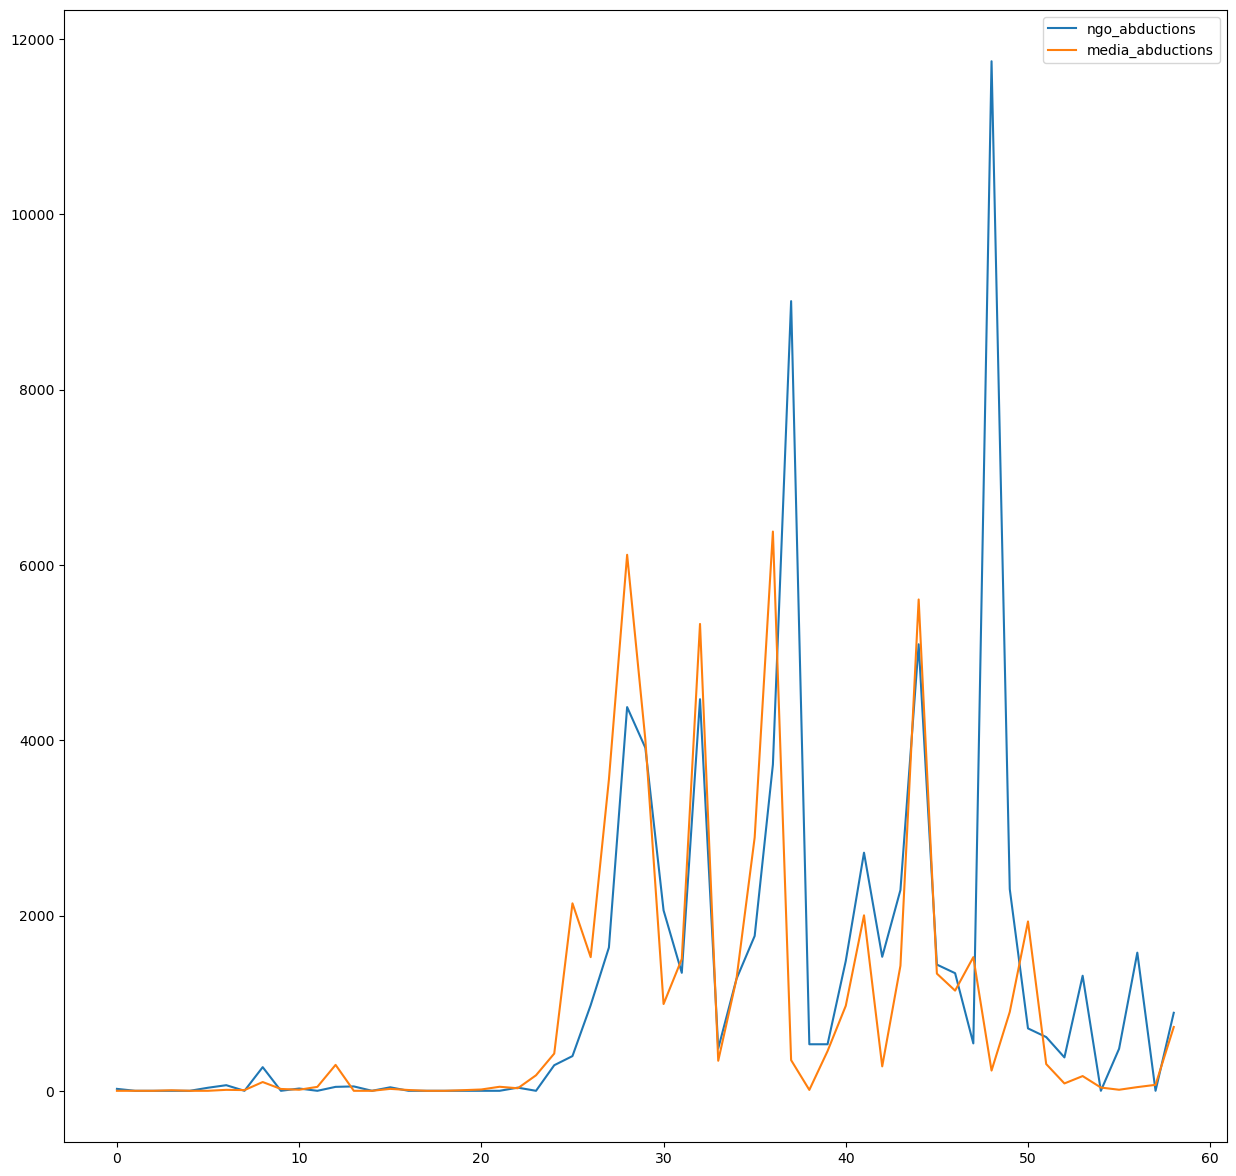

In [41]:
monthly[['ngo_abductions','media_abductions']].plot()

<AxesSubplot:>

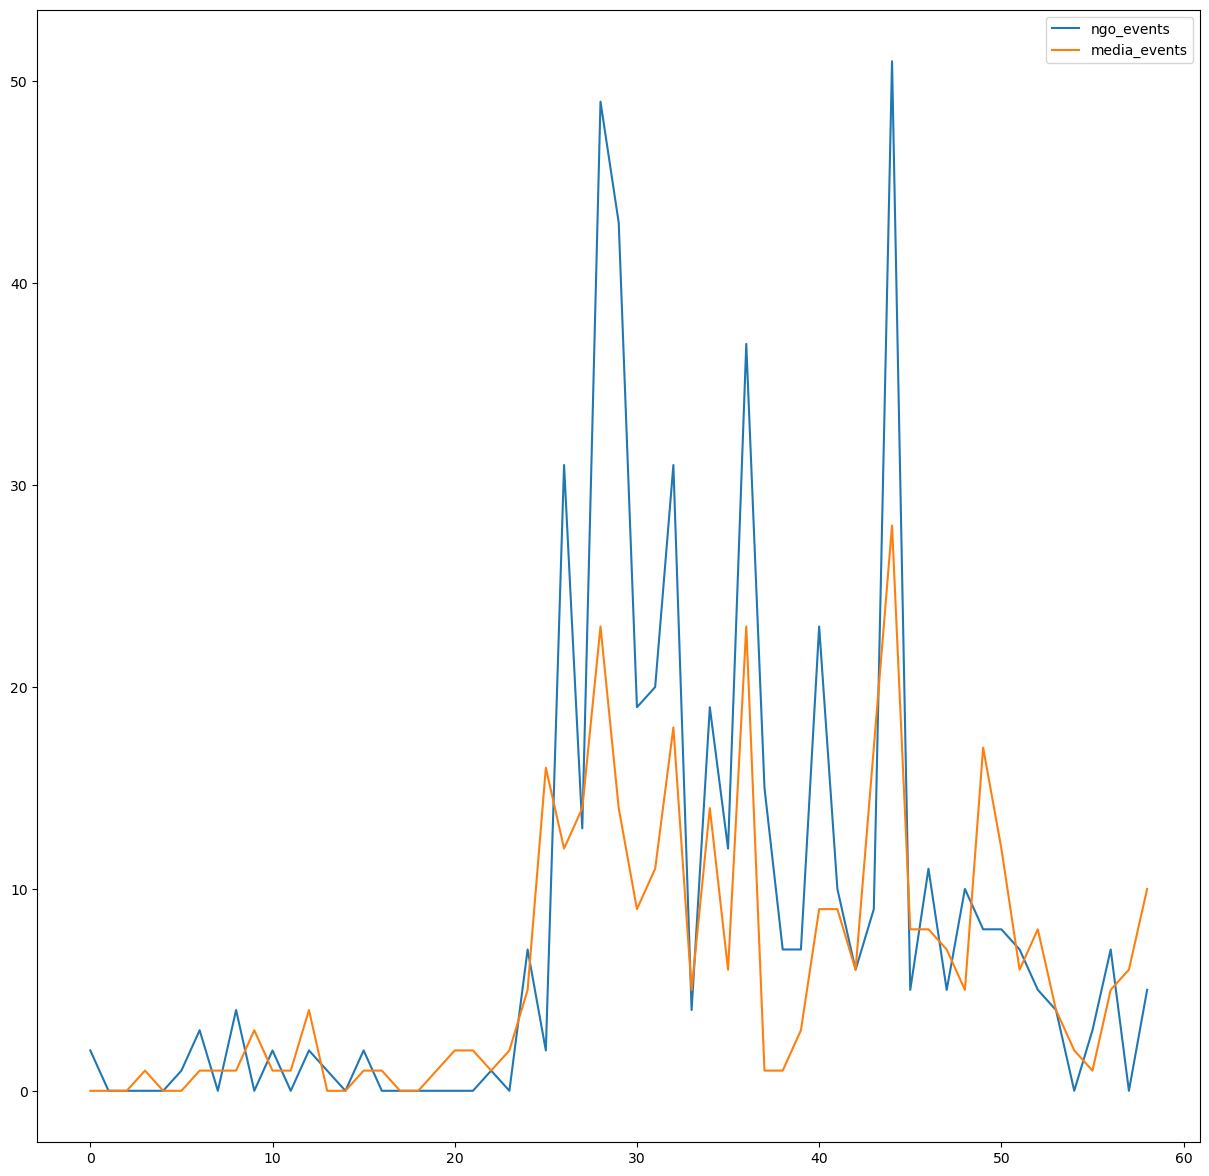

In [42]:
monthly[['ngo_events','media_events']].plot()

In [43]:
monthly['zero']=0
monthly['abductions_delta'] = monthly['ngo_abductions']-monthly['media_abductions']
monthly['events_delta'] = monthly['ngo_events']-monthly['media_events']
monthly['log_abductions_delta'] = np.log10(monthly['ngo_abductions']+1)-np.log10(monthly['media_abductions']+1)

## Use above graphs to make figure 2 in the paper.

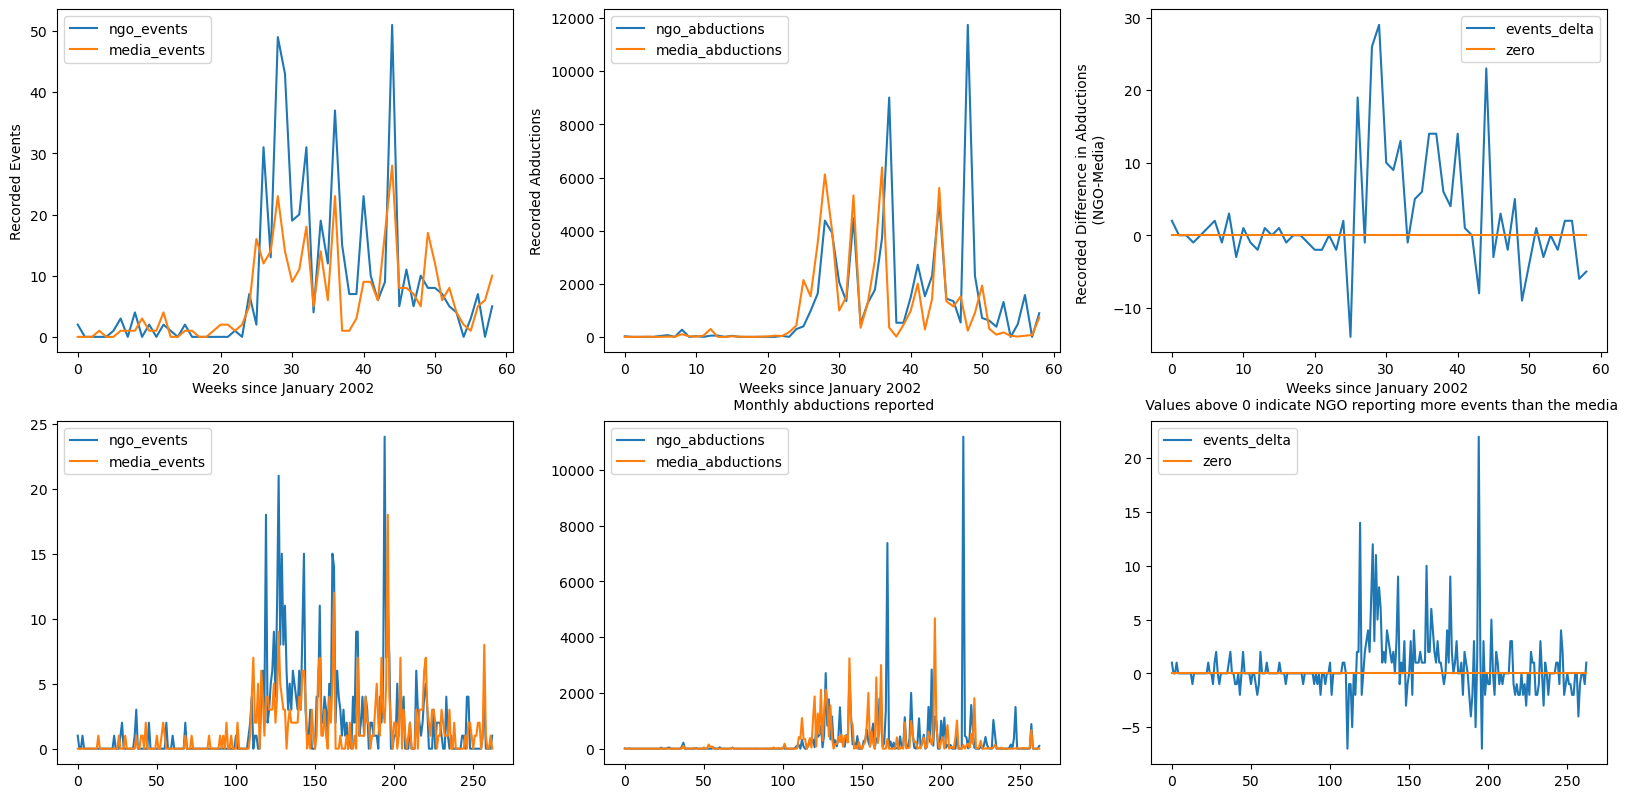

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

monthly[['ngo_events','media_events']].plot(ax=ax[0][0])
ax[0][0].set_xlabel('Months since January 2002 \n ')
ax[0][0].set_ylabel('Recorded Events')

monthly[['ngo_abductions','media_abductions']].plot(ax=ax[0][1])
ax[0][1].set_xlabel('Months since January 2002 \n Monthly abductions reported')
ax[0][1].set_ylabel('Recorded Abductions')

monthly[['events_delta','zero']].plot(ax=ax[0][2])
ax[0][2].set_xlabel('Months since January 2002 \n Values above 0 indicate NGO reporting more events than the media')
ax[0][2].set_ylabel('Recorded Difference in Abductions \n (NGO-Media)')

weekly[['ngo_events','media_events']].plot(ax=ax[1][0])
ax[0][0].set_xlabel('Weeks since January 2002 \n ')
ax[0][0].set_ylabel('Recorded Events')

weekly[['ngo_abductions','media_abductions']].plot(ax=ax[1][1])
ax[0][1].set_xlabel('Weeks since January 2002 \n Monthly abductions reported')
ax[0][1].set_ylabel('Recorded Abductions')

weekly[['events_delta','zero']].plot(ax=ax[1][2])
ax[0][2].set_xlabel('Weeks since January 2002 \n Values above 0 indicate NGO reporting more events than the media')
ax[0][2].set_ylabel('Recorded Difference in Abductions \n (NGO-Media)')

fig.savefig('Nepal/temporals.pdf')

<AxesSubplot:>

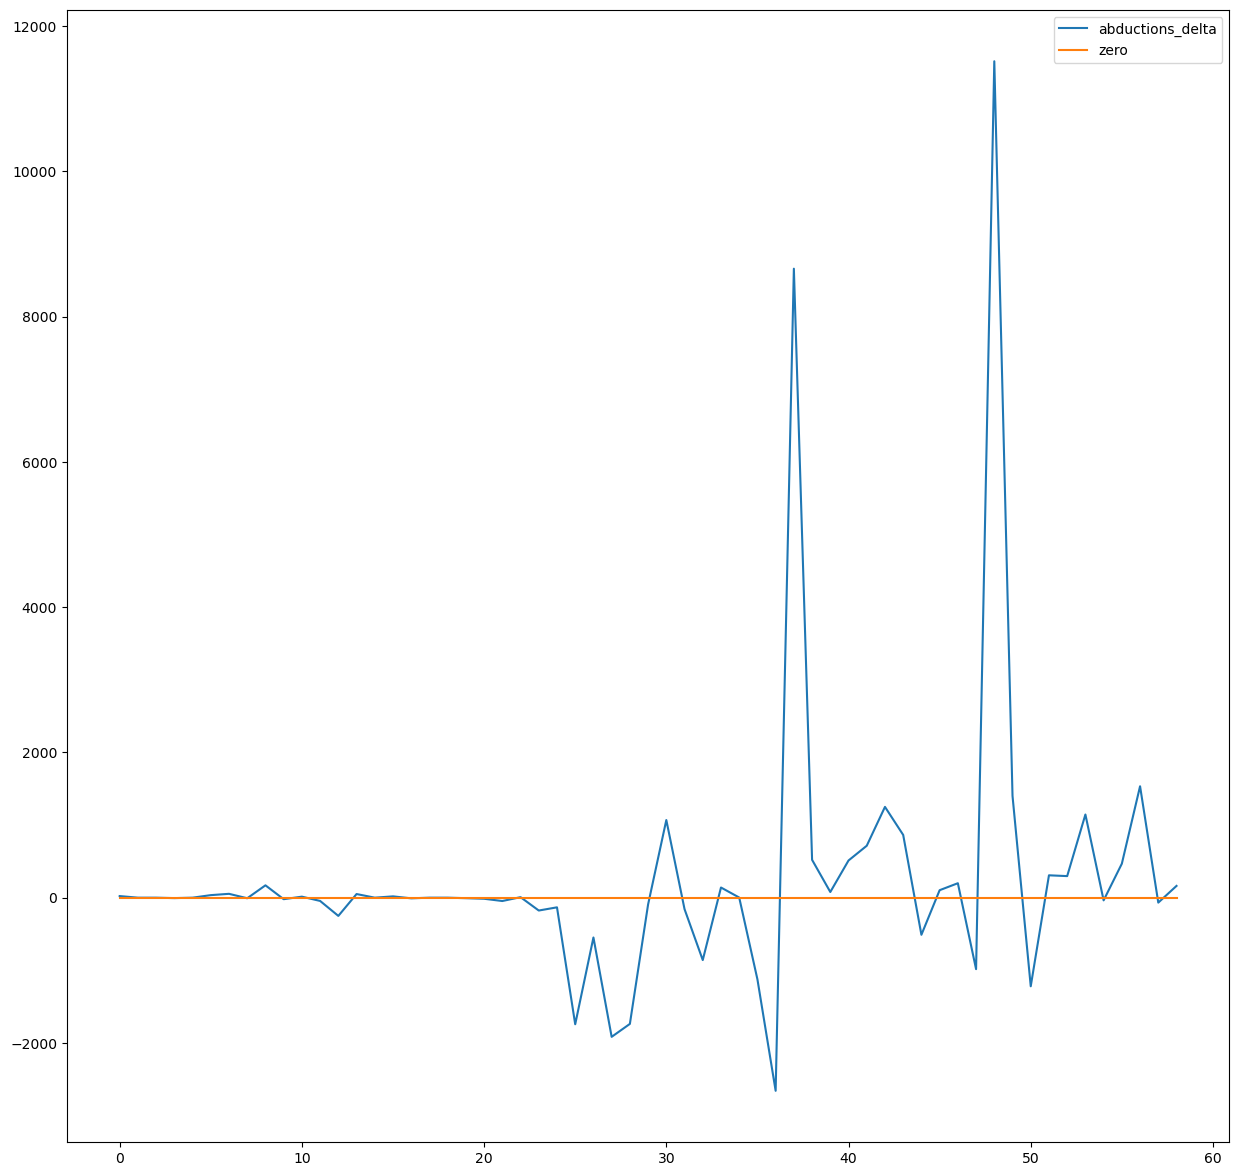

In [45]:
#Above blue line, NGO over-report in terms of count. Below, NGO under-report.
monthly[['abductions_delta','zero']].plot()

In [46]:
ngo

,CASEQUANTITY,CASEDATE,VICTIMSNAME,AGE,GENDER,DISTRICTNAME,VDCMCP,WARDNO,LOCATIONNO,OCCUPATIONDESCRIPTION,DESIGNATION,KILLINGSTYPE,KILLINGSSUBTYPE,VICTIMSTATUSDESCRIPTION,VICTIMSTATUSSUBDESCRIPTION,year,month,week,weekid,monthid
0,10,2002-01-04,Student,NaN,NaN,Kailali,Paddon,9.0,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2002,1,1,1,1
1,12,2002-01-23,Unidentified (Student),25.0,Male,Salyan,Shyunrat,4.0,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,1,4,4,1
2,35,2002-06-15,Unidentified,NaN,NaN,Jumla,Depalgaun,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,6,24,24,6
3,20,2002-07-12,Unidentifed,NaN,NaN,Jumla,Narakot,5.0,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,7,28,28,7
4,22,2002-07-16,Unidentified,NaN,NaN,Jumla,Kanaka Sundari,NaN,0,Student,Student,By Non-State,Maoists,Abduction,Abduction,2002,7,29,29,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,71,2006-11-16,Unidentified,NaN,NaN,Lamjung,,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59
508,12,2006-11-17,Unidentified,NaN,Male,Kaski,,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59
509,400,2006-11-18,Unidentified Children,NaN,NaN,Parsa,Birwaguthi,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59
510,400,2006-11-18,Unidentified Children,NaN,NaN,Parsa,Birwaguthi,NaN,0,Unavailable,NaN,By Non-State,Maoists,Abduction,Abduction,2006,11,46,258,59


<AxesSubplot:>

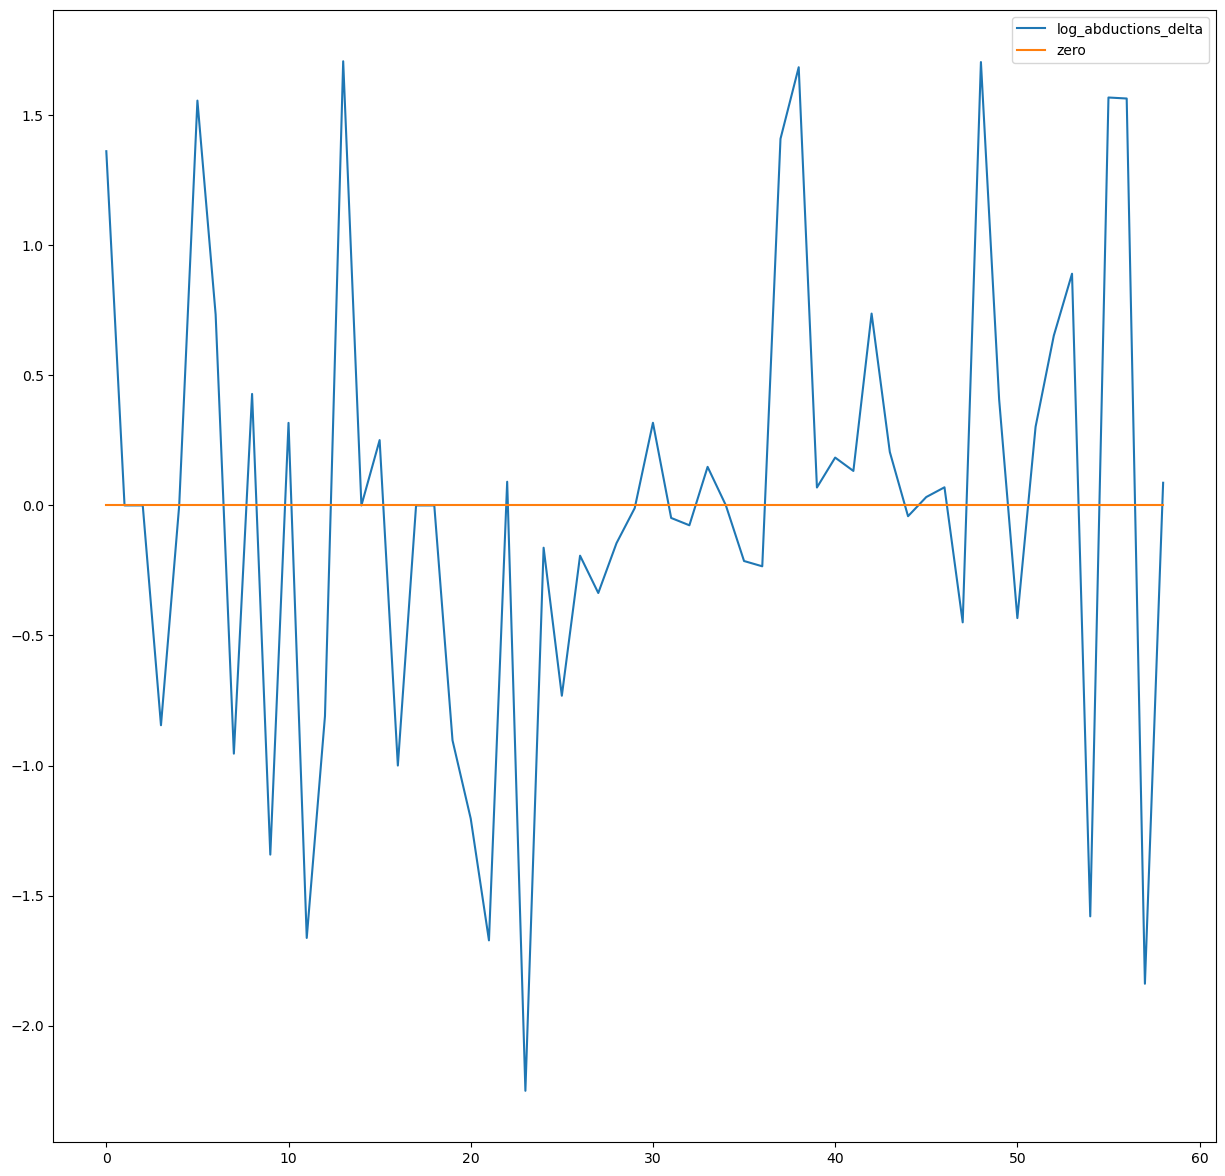

In [47]:
monthly[['log_abductions_delta','zero']].plot()

<AxesSubplot:>

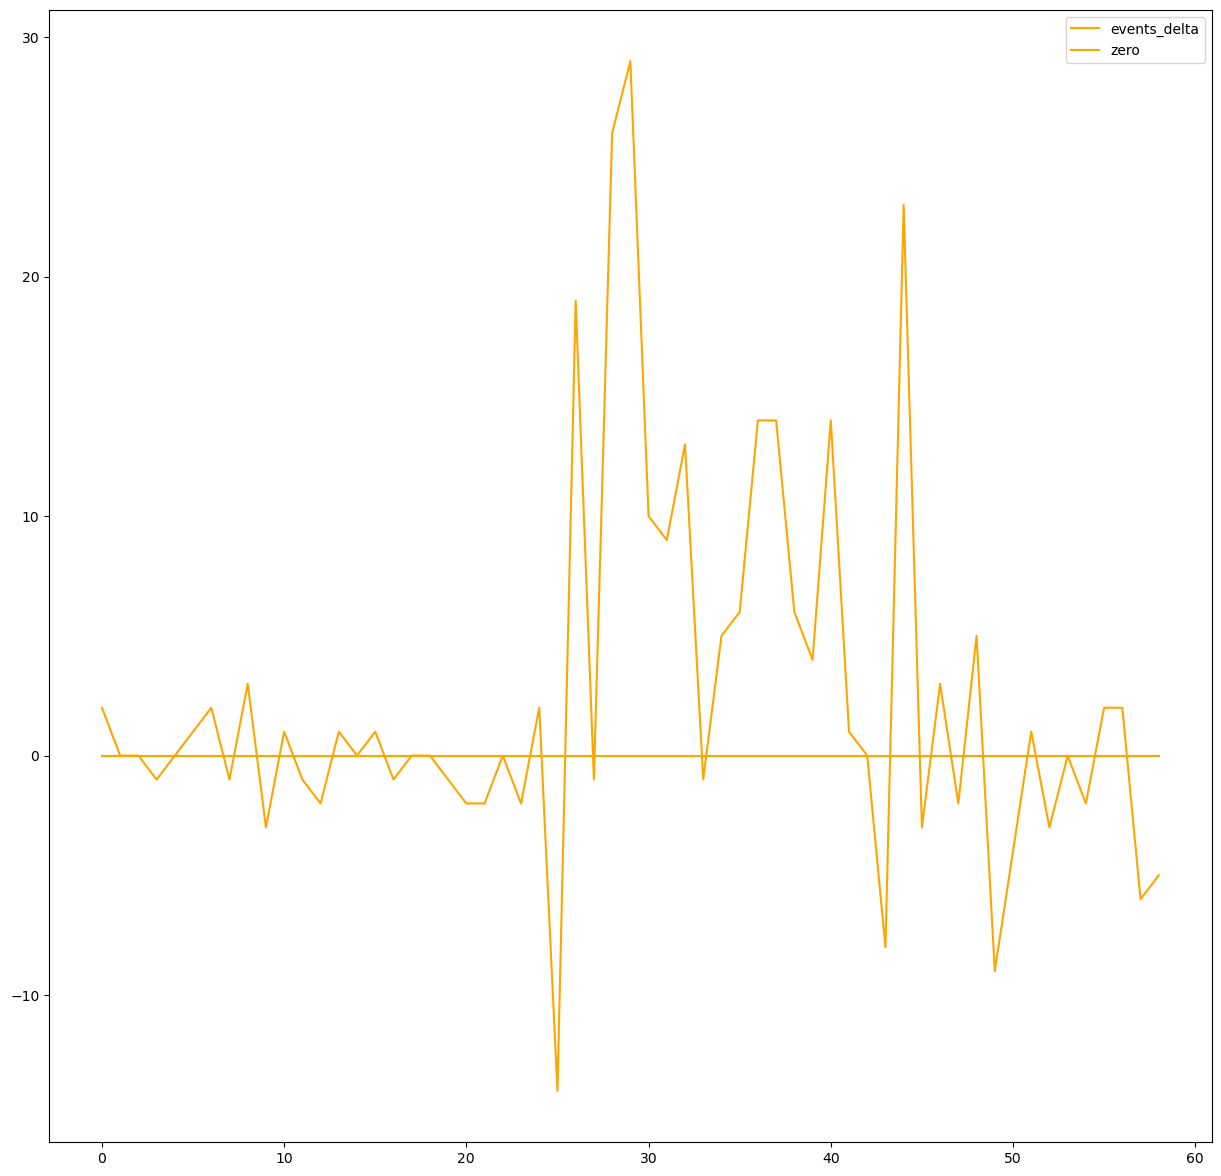

In [48]:
monthly[['events_delta','zero']].plot(color='orange')

In [49]:
monthly.to_csv('Nepal/monthly.csv')

In [50]:
weekly.to_csv('Nepal/weekly.csv')

In [51]:
monthly

,monthid,ngo_abductions,ngo_events,media_abductions,media_events,zero,abductions_delta,events_delta,log_abductions_delta
0,1,22,2,0,0,0,22,2,1.361728
1,2,0,0,0,0,0,0,0,0.000000
2,3,0,0,0,0,0,0,0,0.000000
3,4,0,0,6,1,0,-6,-1,-0.845098
4,5,0,0,0,0,0,0,0,0.000000
5,6,35,1,0,0,0,35,1,1.556303
6,7,64,3,11,1,0,53,2,0.733732
7,8,0,0,8,1,0,-8,-1,-0.954243
8,9,270,4,100,1,0,170,3,0.428648
9,10,0,0,21,3,0,-21,-3,-1.342423


In [52]:
ngo.weekid

0        1
1        4
2       24
3       28
4       29
      ... 
507    258
508    258
509    258
510    258
511    263
Name: weekid, Length: 512, dtype: int64

Figures 2 and 3 

# Geo-analysis prep

In [53]:
ngo_geography = ngo.groupby('DISTRICTNAME', as_index=False)\
.agg({"CASEQUANTITY": "sum","CASEDATE":"count"})\
.rename(columns={"DISTRICTNAME":'district',"CASEQUANTITY":'ngo_abductions',"CASEDATE":'ngo_events'})

media_geography = media.groupby('DISTRICTNAME', as_index=False)\
.agg({"CASEQUANTITY": "sum","CASEDATE":"count"})\
.rename(columns={"DISTRICTNAME":'district',"CASEQUANTITY":'media_abductions',"CASEDATE":'media_events'})


In [54]:
media_geography.to_csv('media_geog.csv')
ngo_geography.to_csv('ngo_geog.csv')

In [55]:
nepal = gpd.read_file('shape/npl_admbnda_districts_nd_20190430.shp')
nepal

,Shape_Leng,Shape_Area,DIST_EN,DIST_PCODE,DIST_REF,DIST_ALT1E,DIST_ALT2E,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.669841,0.157628,Achham,NP0769,None,None,None,7,NP07,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((81.17123 29.38651, 81.17158 29.38636..."
1,2.379392,0.113604,Arghakhanchi,NP0550,None,None,None,5,NP05,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((83.00452 28.11196, 83.00497 28.11185..."
2,2.885914,0.168997,Baglung,NP0443,None,None,None,4,NP04,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((83.09969 28.63449, 83.10098 28.63409..."
3,2.499412,0.138908,Baitadi,NP0774,None,None,None,7,NP07,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((80.75845 29.70454, 80.75864 29.70430..."
4,3.157278,0.322517,Bajhang,NP0767,None,None,None,7,NP07,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((81.09006 30.05419, 81.09033 30.05418..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2.306762,0.095237,Syangja,NP0441,None,None,None,4,NP04,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((83.80659 28.21951, 83.80678 28.21945..."
73,2.753912,0.144202,Tanahu,NP0440,None,None,None,4,NP04,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((84.40018 28.12679, 84.40105 28.12644..."
74,2.879520,0.332004,Taplejung,NP0101,None,None,None,1,NP01,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((87.83415 27.95165, 87.83477 27.95147..."
75,1.184713,0.061062,Terhathum,NP0108,None,None,None,1,NP01,Nepal,NP,2017-11-15,2019-04-30,None,"POLYGON ((87.53561 27.29123, 87.53638 27.29112..."


<AxesSubplot:>

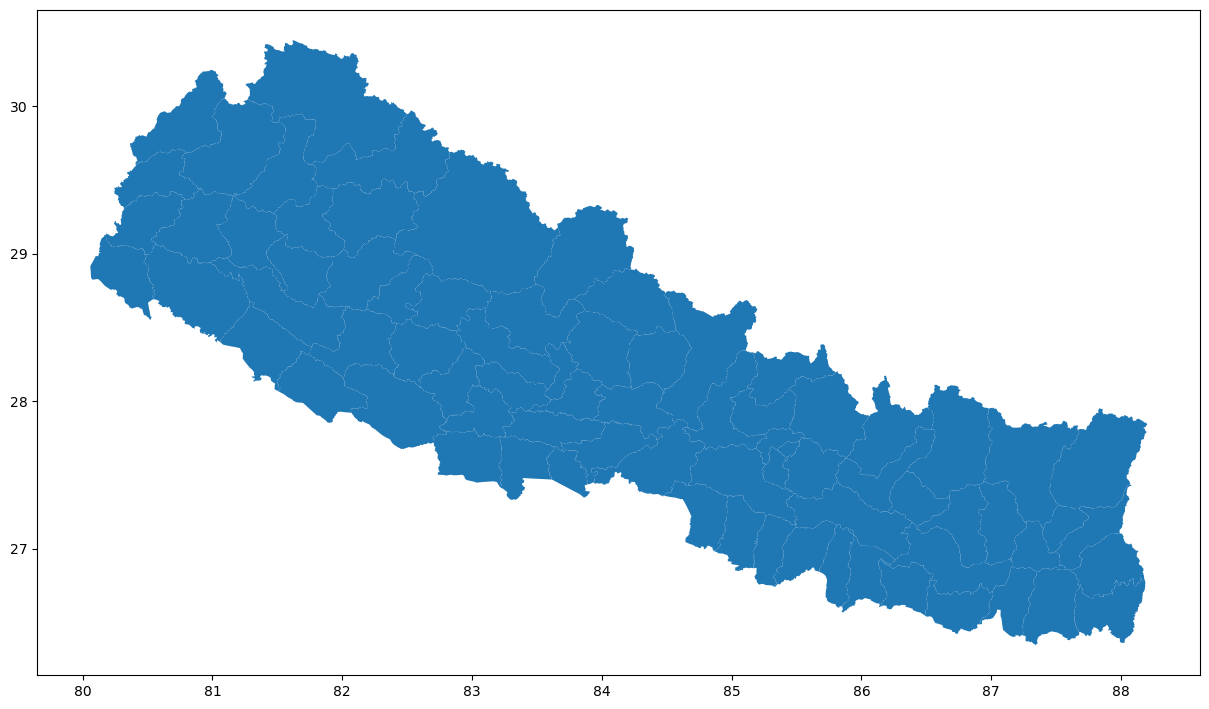

In [56]:
nepal.plot()

In [57]:
media_geo=pd.read_csv('media_geog_man.csv').groupby('district', as_index=False)\
.agg({"media_abductions": "sum","media_events":"sum"})
ngo_geo=pd.read_csv('ngo_geog_man.csv').groupby('district', as_index=False)\
.agg({"ngo_abductions": "sum","ngo_events":"sum"})
media_geo.head()

,district,media_abductions,media_events
0,Achham,5206,24
1,Baglung,1017,11
2,Baitadi,1544,7
3,Bajhang,94,3
4,Bajura,3926,12


# The clean aggregated datasets should show empty below.

If not you have to manually clean these. These changes to match SHP files should be propagated "back" to the original dataset!
Also, the EAST-WEST distinctions for districts should be molten in the SHP

In [58]:
ngoclean = nepal.merge(ngo_geo, left_on='DIST_EN', right_on='district', how='right')[['district','DIST_EN']]
ngoclean[ngoclean.DIST_EN.isna()]

,district,DIST_EN


In [59]:
mediaclean = nepal.merge(media_geo, left_on='DIST_EN', right_on='district', how='right')[['district','DIST_EN']]
mediaclean[mediaclean.DIST_EN.isna()]

,district,DIST_EN


# Finally, let's make a choropeth

In [60]:
nepal_sp = nepal.merge(ngo_geo, left_on='DIST_EN', right_on='district', how='left')
nepal_sp = nepal_sp.merge(media_geo, left_on='DIST_EN', right_on='district', how='left')

nepal_sp[['ngo_events', 'media_events','ngo_abductions', 'media_abductions']] = \
nepal_sp[['ngo_events', 'media_events','ngo_abductions', 'media_abductions']].fillna(value=0)

In [61]:
nepal_sp['diff_events']=nepal_sp.ngo_events - nepal_sp.media_events
nepal_sp['diff_abductions'] = nepal_sp['ngo_abductions']-nepal_sp['media_abductions']

nepal_sp[['DIST_EN','diff_events','ngo_events','media_events']].sort_values(by='diff_events').head(10)

,DIST_EN,diff_events,ngo_events,media_events
0,Achham,-17.0,7.0,24.0
21,Doti,-10.0,7.0,17.0
63,Sankhuwasabha,-6.0,3.0,9.0
58,Rolpa,-6.0,0.0,6.0
14,Dang,-5.0,2.0,7.0
32,Kanchanpur,-4.0,0.0,4.0
13,Dailekh,-4.0,3.0,7.0
76,Udayapur,-4.0,5.0,9.0
2,Baglung,-4.0,7.0,11.0
42,Morang,-3.0,0.0,3.0


In [62]:
nepal_sp[['DIST_EN','diff_events','ngo_events','media_events']].sort_values(by='diff_events').tail(10)

,DIST_EN,diff_events,ngo_events,media_events
28,Jumla,8.0,11.0,3.0
75,Terhathum,10.0,11.0,1.0
55,Ramechhap,10.0,24.0,14.0
16,Dhading,11.0,23.0,12.0
74,Taplejung,13.0,24.0,11.0
71,Surkhet,15.0,19.0,4.0
49,Okhaldhunga,19.0,21.0,2.0
17,Dhankuta,26.0,30.0,4.0
66,Sindhuli,34.0,38.0,4.0
5,Bajura,43.0,55.0,12.0


# Figure 4. The map of districts:

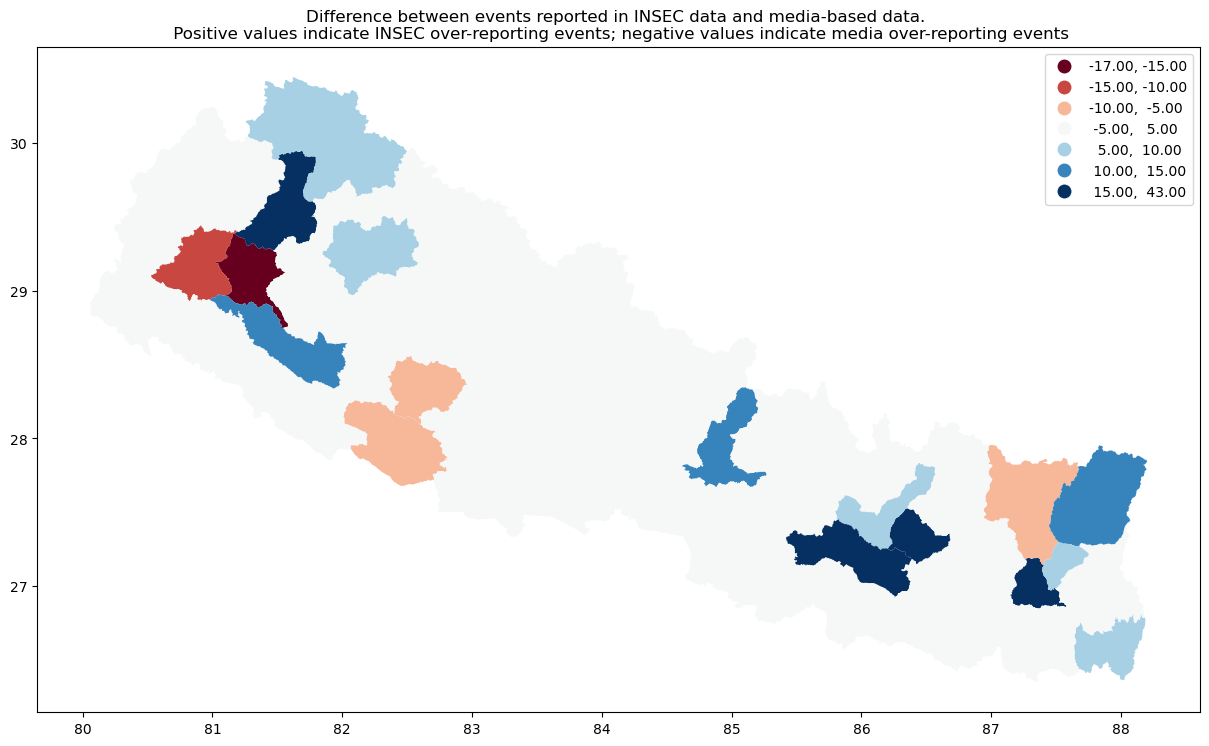

In [63]:

plt.rcParams['figure.figsize'] = [15, 15]
fig_titles = ['Difference between events reported in INSEC data and media-based data. \n Positive values indicate INSEC over-reporting events; negative values indicate media over-reporting events']
ax=nepal_sp.plot(column='diff_events', cmap='RdBu', legend=True, scheme='user_defined', classification_kwds={'bins':np.array([ -15, -10, -5, 5, 10, 15])})
ax.set_title(fig_titles[0])
plt.savefig('Nepal/map_newbins.pdf')

# Figure 1 in Revision Memo:

In [64]:

wq =  lps.weights.Queen.from_dataframe(nepal_sp)

In [65]:
np.random.seed(9943359)
mi = esda.moran.Moran(nepal_sp[['diff_events']], wq)
mi_k = esda.moran.Moran(nepal_sp[['diff_abductions']], wq)
print (f'EVENT DIFF : Moran global I : {mi.I}, Simulated p-value (one-tailed): {mi.p_sim}')
print (f'ABDUCTION DIFF : Moran global I : {mi_k.I}, Simulated p-value (one-tailed): {mi_k.p_sim}')

EVENT DIFF : Moran global I : -0.06219983568123016, Simulated p-value (one-tailed): 0.274
ABDUCTION DIFF : Moran global I : 0.08631812557858255, Simulated p-value (one-tailed): 0.051


In [66]:
li = esda.moran.Moran_Local(nepal_sp[['diff_events']], wq)
li.q
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [67]:
sig

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True])

/var/folders/r9/147lb9956w3cl4tl0kktrl3r0000gn/T/ipykernel_79700/1684741008.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  nepal_sp['msl'] = [spot_labels[i] for i in spots]


<AxesSubplot:>

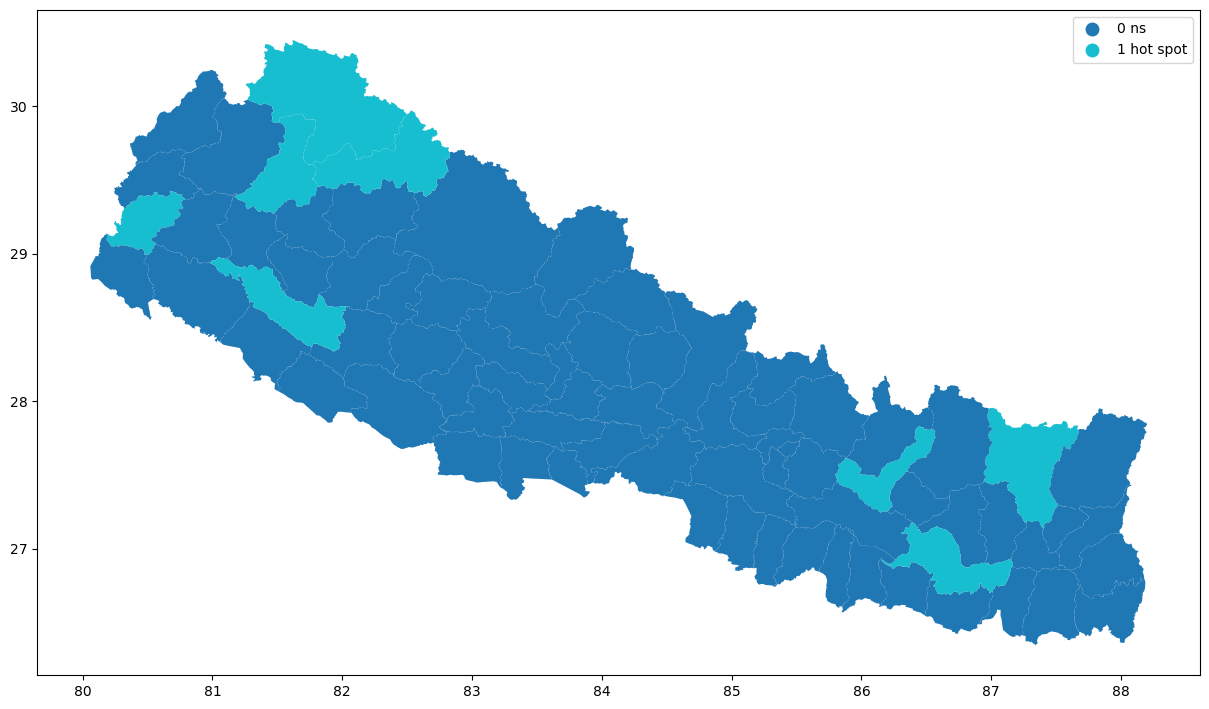

In [68]:
li = esda.moran.Moran_Local(nepal_sp[['diff_events']], wq)
li.q
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
nepal_sp['msl'] = [spot_labels[i] for i in spots]
nepal_sp.plot(column='msl', legend=True)

In [69]:
list(pd.DataFrame(media.DISTRICTNAME.unique()).sort_values(by=0)[0])

['Achham',
 'Baglung',
 'Baitadi',
 'Bajhang',
 'Bajura',
 'Bajura, Accham',
 'Banjura',
 'Banke',
 'Bara',
 'Bardiya & Achham',
 'Bhojpur',
 'Butawal',
 'Chitwan',
 'Dadeldhura',
 'Dailekh',
 'Dandeldhura',
 'Dandeldhura, Kalikot',
 'Dang',
 'Darchula',
 'Dhading',
 'Dhankuta',
 'Dhanusha',
 'Dolakha',
 'Dolpa',
 'Doti',
 'Doti district',
 'Doti, Kailali',
 'Gorkha',
 'Gulmi',
 'Ilam',
 'Jajarkot',
 'Jhapa',
 'Jumla',
 'Kailali',
 'Kalikot',
 'Kanchanpur',
 'Kaski',
 'Kathmandu',
 'Kavre',
 'Kavrepalachowk',
 'Khotang',
 'Lamjung',
 'Mahottari',
 'Makwanpur',
 'Makwanpur, Lalitpur',
 'Morang',
 'Mugu',
 'Myagdi',
 'Nawalparasi',
 'Nuwakot',
 'Okaldhunga',
 'Okhaldunga',
 'Palpa',
 'Palung',
 'Panchthar',
 'Parbat',
 'Pyuthan',
 'Ramchhap',
 'Ramechhap',
 'Ramechhap, Sindhuli, Sindhupalchowk and Dolakha',
 'Rautahat',
 'Rolpa',
 'Rukum',
 'Rupandehi',
 'Salyan',
 'Sankhuwas bha',
 'Sankhuwasabha',
 'Saptari',
 'Sarlahi',
 'Sindhuli',
 'Sindhupalchowk',
 'Solukhumbu',
 'Solukhumbu ',
 '

In [70]:
ngo[ngo.DISTRICTNAME=='Achham'].to_excel('Nepal/check_ngo_Achham.xlsx')

In [71]:
media[media.DISTRICTNAME=='Achham'].to_excel('Nepal/check_media_Achham.xlsx')

In [72]:
ngo[ngo.DISTRICTNAME.str.contains('Doti')].to_excel('Nepal/check_ngo_Doti.xlsx')

In [73]:
media_subset=media.copy()
media_subset.DISTRICTNAME[media_subset.DISTRICTNAME.isna()]='Unknown'

/var/folders/r9/147lb9956w3cl4tl0kktrl3r0000gn/T/ipykernel_79700/2680996852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_subset.DISTRICTNAME[media_subset.DISTRICTNAME.isna()]='Unknown'


# Granger Tests

In [74]:
print(grangercausalitytests(weekly[['media_events','ngo_events']], maxlag=1, addconst=True, verbose=True))
granger_direct = grangercausalitytests(weekly[['media_events','ngo_events']], maxlag=8, addconst=True, verbose=True)
granger_reverse = grangercausalitytests(weekly[['ngo_events','media_events']], maxlag=8, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.0687 , p=0.0000  , df_denom=259, df_num=1
ssr based chi2 test:   chi2=31.4285 , p=0.0000  , df=1
likelihood ratio test: chi2=29.6819 , p=0.0000  , df=1
parameter F test:         F=31.0687 , p=0.0000  , df_denom=259, df_num=1
{1: ({'ssr_ftest': (31.06866433554606, 6.244674611809246e-08, 259.0, 1), 'ssr_chi2test': (31.42853303441339, 2.0691769202123545e-08, 1), 'lrtest': (29.681876988252725, 5.0908544081305994e-08, 1), 'params_ftest': (31.068664335545918, 6.244674611809557e-08, 259.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x14bbc3c70>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x14cd4a5b0>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.0687 , p=0.0000  , df_denom=259, df_num=1
ssr based chi2 test:   chi2=31.4285 , p=0.0000  , df=1
likelihood ratio test: chi2=29.6819 , p=0.0000  , df=1
p

# Table 1 - Granger Tests

In [75]:
f_values = [granger_direct[i][0]['ssr_ftest'][0] for i in range(1,9)]
p_values = [granger_direct[i][0]['ssr_ftest'][1] for i in range(1,9)]
f_values_reverse  = [granger_reverse[i][0]['ssr_ftest'][0] for i in range(1,9)]
p_values_reverse = [granger_reverse[i][0]['ssr_ftest'][1] for i in range(1,9)]

rho = pd.DataFrame({'lag':list(range(1,9)), 'f':f_values, 'p':p_values,\
             'f reverse':f_values_reverse, 'p reverse':p_values_reverse}).round(2)

print(rho.to_latex())
rho


\begin{tabular}{lrrrrr}
\toprule
{} &  lag &      f &    p &  f reverse &  p reverse \\
\midrule
0 &    1 &  31.07 &  0.0 &       1.63 &       0.20 \\
1 &    2 &  20.68 &  0.0 &       1.11 &       0.33 \\
2 &    3 &  13.39 &  0.0 &       0.38 &       0.77 \\
3 &    4 &  10.79 &  0.0 &       0.44 &       0.78 \\
4 &    5 &   8.86 &  0.0 &       1.52 &       0.18 \\
5 &    6 &   7.30 &  0.0 &       1.23 &       0.29 \\
6 &    7 &   6.14 &  0.0 &       0.96 &       0.46 \\
7 &    8 &   5.42 &  0.0 &       1.49 &       0.16 \\
\bottomrule
\end{tabular}



,lag,f,p,f reverse,p reverse
0,1,31.07,0.0,1.63,0.20
1,2,20.68,0.0,1.11,0.33
2,3,13.39,0.0,0.38,0.77
3,4,10.79,0.0,0.44,0.78
4,5,8.86,0.0,1.52,0.18
5,6,7.30,0.0,1.23,0.29
6,7,6.14,0.0,0.96,0.46
7,8,5.42,0.0,1.49,0.16


In [76]:
print(grangercausalitytests(weekly[['ngo_abductions','media_abductions']], maxlag=8, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4459  , p=0.1191  , df_denom=259, df_num=1
ssr based chi2 test:   chi2=2.4742  , p=0.1157  , df=1
likelihood ratio test: chi2=2.4626  , p=0.1166  , df=1
parameter F test:         F=2.4459  , p=0.1191  , df_denom=259, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1852  , p=0.3074  , df_denom=256, df_num=2
ssr based chi2 test:   chi2=2.4167  , p=0.2987  , df=2
likelihood ratio test: chi2=2.4056  , p=0.3003  , df=2
parameter F test:         F=1.1852  , p=0.3074  , df_denom=256, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4084  , p=0.2408  , df_denom=253, df_num=3
ssr based chi2 test:   chi2=4.3420  , p=0.2268  , df=3
likelihood ratio test: chi2=4.3061  , p=0.2302  , df=3
parameter F test:         F=1.4084  , p=0.2408  , df_denom=253, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.1557  , p=0.0001  

In [77]:
print(grangercausalitytests(weekly[['media_abductions','ngo_abductions']], maxlag=8, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5931  , p=0.2080  , df_denom=259, df_num=1
ssr based chi2 test:   chi2=1.6115  , p=0.2043  , df=1
likelihood ratio test: chi2=1.6066  , p=0.2050  , df=1
parameter F test:         F=1.5931  , p=0.2080  , df_denom=259, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8837  , p=0.1541  , df_denom=256, df_num=2
ssr based chi2 test:   chi2=3.8410  , p=0.1465  , df=2
likelihood ratio test: chi2=3.8130  , p=0.1486  , df=2
parameter F test:         F=1.8837  , p=0.1541  , df_denom=256, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2037  , p=0.3089  , df_denom=253, df_num=3
ssr based chi2 test:   chi2=3.7111  , p=0.2944  , df=3
likelihood ratio test: chi2=3.6849  , p=0.2976  , df=3
parameter F test:         F=1.2037  , p=0.3089  , df_denom=253, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8959  , p=0.4669  

In [78]:
media.VDCMCP.isnull().sum()/media.VDCMCP.shape[0]

0.779291553133515

# Figures in the Web Appendix

In [79]:
media_set = media[['CASEQUANTITY','weekid']]

In [80]:
import warnings
warnings.filterwarnings('ignore')

def bucket_compare(low_thresh = 10, high_thresh = 100):

    ngo_set = ngo[['CASEQUANTITY','weekid']]
    ngo_set['low_ngo'] = 0
    ngo_set['mid_ngo'] = 0
    ngo_set['high_ngo'] = 0

    ngo_set.loc[(ngo_set.CASEQUANTITY<low_thresh),'low_ngo'] = 1
    ngo_set.loc[(ngo_set.CASEQUANTITY>=low_thresh) & (ngo_set.CASEQUANTITY<high_thresh),'mid_ngo'] = 1
    ngo_set.loc[(ngo_set.CASEQUANTITY>=high_thresh),'high_ngo'] = 1
    ngo_set=ngo_set.groupby('weekid').agg('sum')


    media_set = media[['CASEQUANTITY','weekid']]
    media_set['low_media'] = 0
    media_set['mid_media'] = 0
    media_set['high_media'] = 0

    media_set.loc[(media_set.CASEQUANTITY<low_thresh),'low_media'] = 1
    media_set.loc[(media_set.CASEQUANTITY>=low_thresh) & (media_set.CASEQUANTITY<high_thresh),'mid_media'] = 1
    media_set.loc[(media_set.CASEQUANTITY>=high_thresh),'high_media'] = 1
    media_set=media_set.groupby('weekid').agg('sum')

    print('NGO set aggs :\n',ngo_set.agg('sum'),'\n\n')
    print('MEDIA set aggs :\n',media_set.agg('sum'),'\n\n')

    out = ngo_set.join(media_set,how='outer',lsuffix='_n').fillna(0)
    print ("Merged :")
    print ("*"*24)
    print (out.head())
    return out

In [81]:
def bootstrap(bucket_compare_output):
    
    ms = bucket_compare_output.copy()

    np.random.seed(53)
    
    ms['prop_low'] = ms.low_media / ms.low_ngo
    ms['prop_mid'] = ms.mid_media / ms.mid_ngo
    ms['prop_high'] = ms.high_media / ms.high_ngo
    ms = ms.replace([np.inf, -np.inf], np.nan)

    low_1 = ms.prop_low.dropna()
    mid_1 = ms.prop_mid.dropna()
    high_1 = ms.prop_high.dropna()
    low_1.mean(), mid_1.mean(), high_1.mean()

    bootstrap_low = []
    bootstrap_mid = []
    bootstrap_high = []
    for i in range(0,10000):
        b_low = low_1.sample(frac=1,replace=True).mean()
        b_mid = mid_1.sample(frac=1,replace=True).mean()
        b_high = high_1.sample(frac=1,replace=True).mean()
        bootstrap_low += [b_low]
        bootstrap_mid += [b_mid]
        bootstrap_high += [b_high]
    bootstrap_low.sort()
    bootstrap_mid.sort()
    bootstrap_high.sort()
    print('Low  (0.025,0.5,0.975):',bootstrap_low[250],bootstrap_low[5000],bootstrap_low[9750])
    print('Mid  (0.025,0.5,0.975):',bootstrap_mid[250],bootstrap_mid[5000],bootstrap_mid[9750])
    print('High (0.025,0.5,0.975):',bootstrap_high[250],bootstrap_high[5000],bootstrap_high[9750])
    return bootstrap_low, bootstrap_mid, bootstrap_high

In [82]:
def bootstrap_plot(bootstrap_low, 
                   bootstrap_mid, 
                   bootstrap_high, 
                   fname='plt_a1.png', 
                   title=' ',
                   y_axes = ['Low-intensity (5-10)','Mid-intensity (10-100)','High-intensity (100+)']):
    mid = (bootstrap_low[5000],bootstrap_mid[5000],bootstrap_high[5000])
    err_low = (bootstrap_low[5000]-bootstrap_low[250],
           bootstrap_mid[5000]-bootstrap_mid[250],
           bootstrap_high[5000]-bootstrap_high[250])
    err_high = (bootstrap_low[9750]-bootstrap_low[5000],
           bootstrap_mid[9750]-bootstrap_mid[5000],
           bootstrap_high[9750]-bootstrap_high[5000])
    err = [err_low,err_high]
    plt.scatter(mid,y_axes)
    plt.title(title)
    plt.errorbar(mid,y_axes,xerr=err,fmt="o")
    plt.show()
    plt.savefig(fname)

NGO set aggs :
 CASEQUANTITY    73923
low_ngo            79
mid_ngo           281
high_ngo          152
dtype: int64 


MEDIA set aggs :
 CASEQUANTITY    56899
low_media          65
mid_media         168
high_media        134
dtype: int64 


Merged :
************************
        CASEQUANTITY_n  low_ngo  mid_ngo  high_ngo  CASEQUANTITY  low_media  \
weekid                                                                        
1                 10.0      0.0      1.0       0.0           0.0        0.0   
4                 12.0      0.0      1.0       0.0           0.0        0.0   
14                 0.0      0.0      0.0       0.0           6.0        1.0   
24                35.0      0.0      1.0       0.0           0.0        0.0   
27                 0.0      0.0      0.0       0.0          11.0        0.0   

        mid_media  high_media  
weekid                         
1             0.0         0.0  
4             0.0         0.0  
14            0.0         0.0  
24        

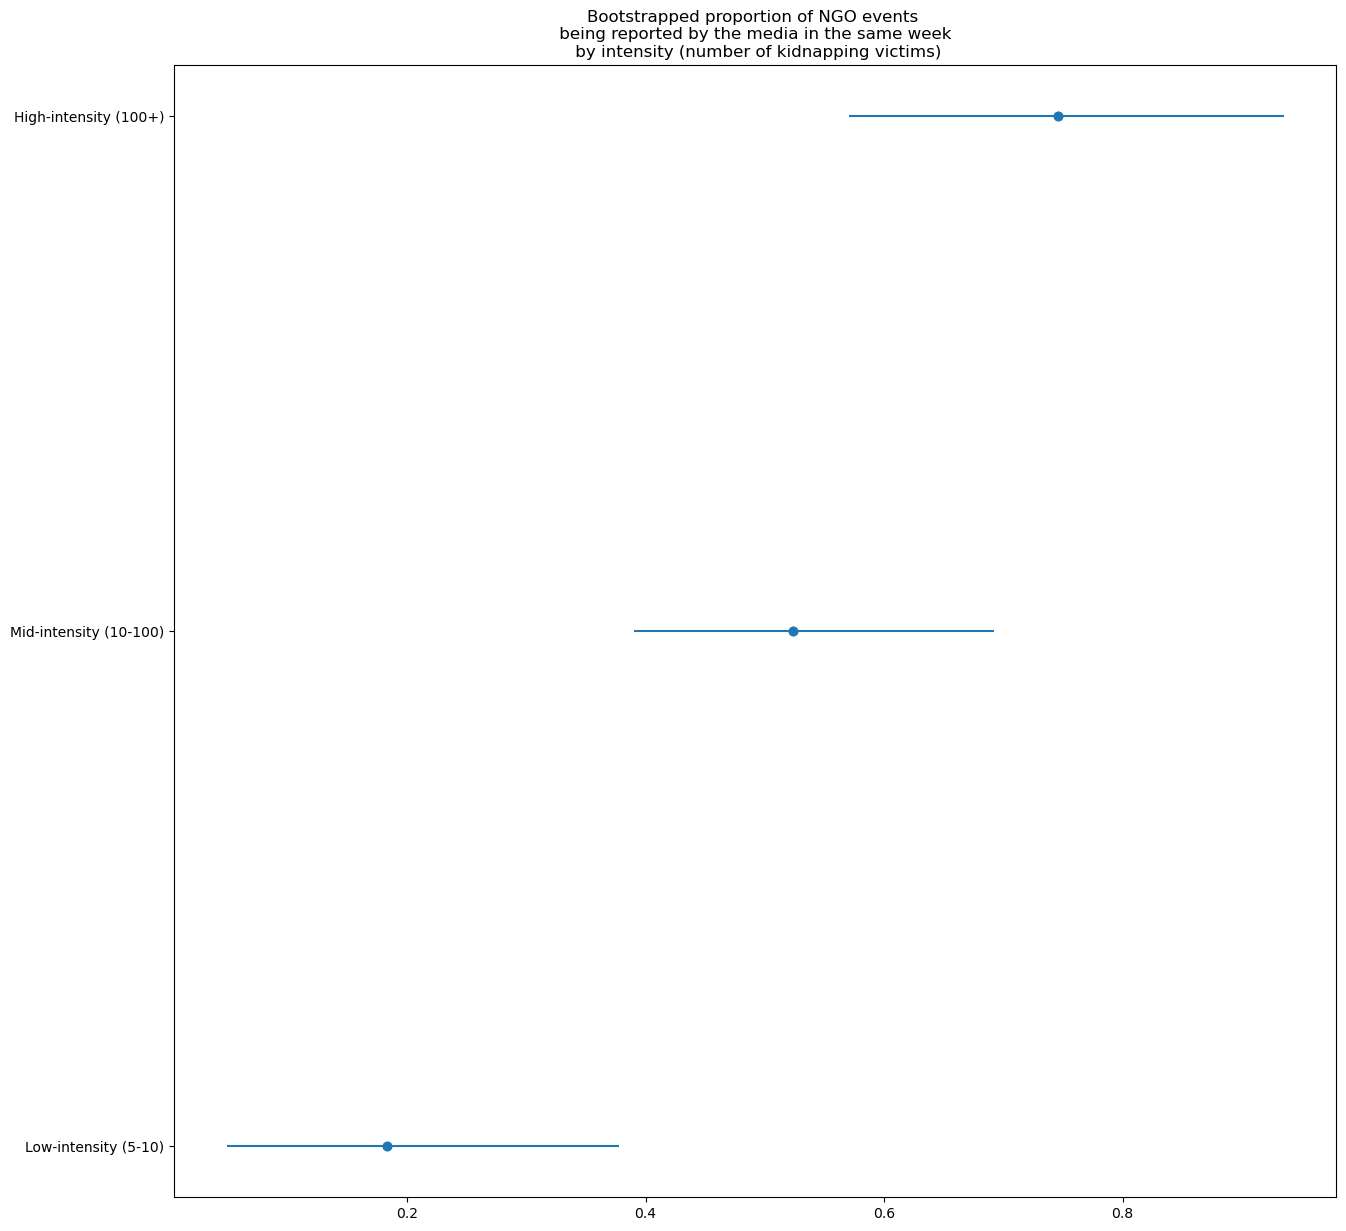

<Figure size 1500x1500 with 0 Axes>

In [83]:
merge_set_no_lag = bucket_compare()

print ()
print ('*'*24)
print ('Bootstrap Statistics')
print ('*'*24,'\n')

bootstrap_low, bootstrap_mid, bootstrap_high = bootstrap(merge_set_no_lag)

bootstrap_plot(
    bootstrap_low, bootstrap_mid, bootstrap_high,
    title='''Bootstrapped proportion of NGO events \n being reported by the media in the same week \n by intensity (number of kidnapping victims)''',
)

NGO set aggs :
 CASEQUANTITY    73923
low_ngo           227
mid_ngo           217
high_ngo           68
dtype: int64 


MEDIA set aggs :
 CASEQUANTITY    56899
low_media         147
mid_media         156
high_media         64
dtype: int64 


Merged :
************************
        CASEQUANTITY_n  low_ngo  mid_ngo  high_ngo  CASEQUANTITY  low_media  \
weekid                                                                        
1                 10.0      1.0      0.0       0.0           0.0        0.0   
4                 12.0      1.0      0.0       0.0           0.0        0.0   
14                 0.0      0.0      0.0       0.0           6.0        1.0   
24                35.0      0.0      1.0       0.0           0.0        0.0   
27                 0.0      0.0      0.0       0.0          11.0        1.0   

        mid_media  high_media  
weekid                         
1             0.0         0.0  
4             0.0         0.0  
14            0.0         0.0  
24        

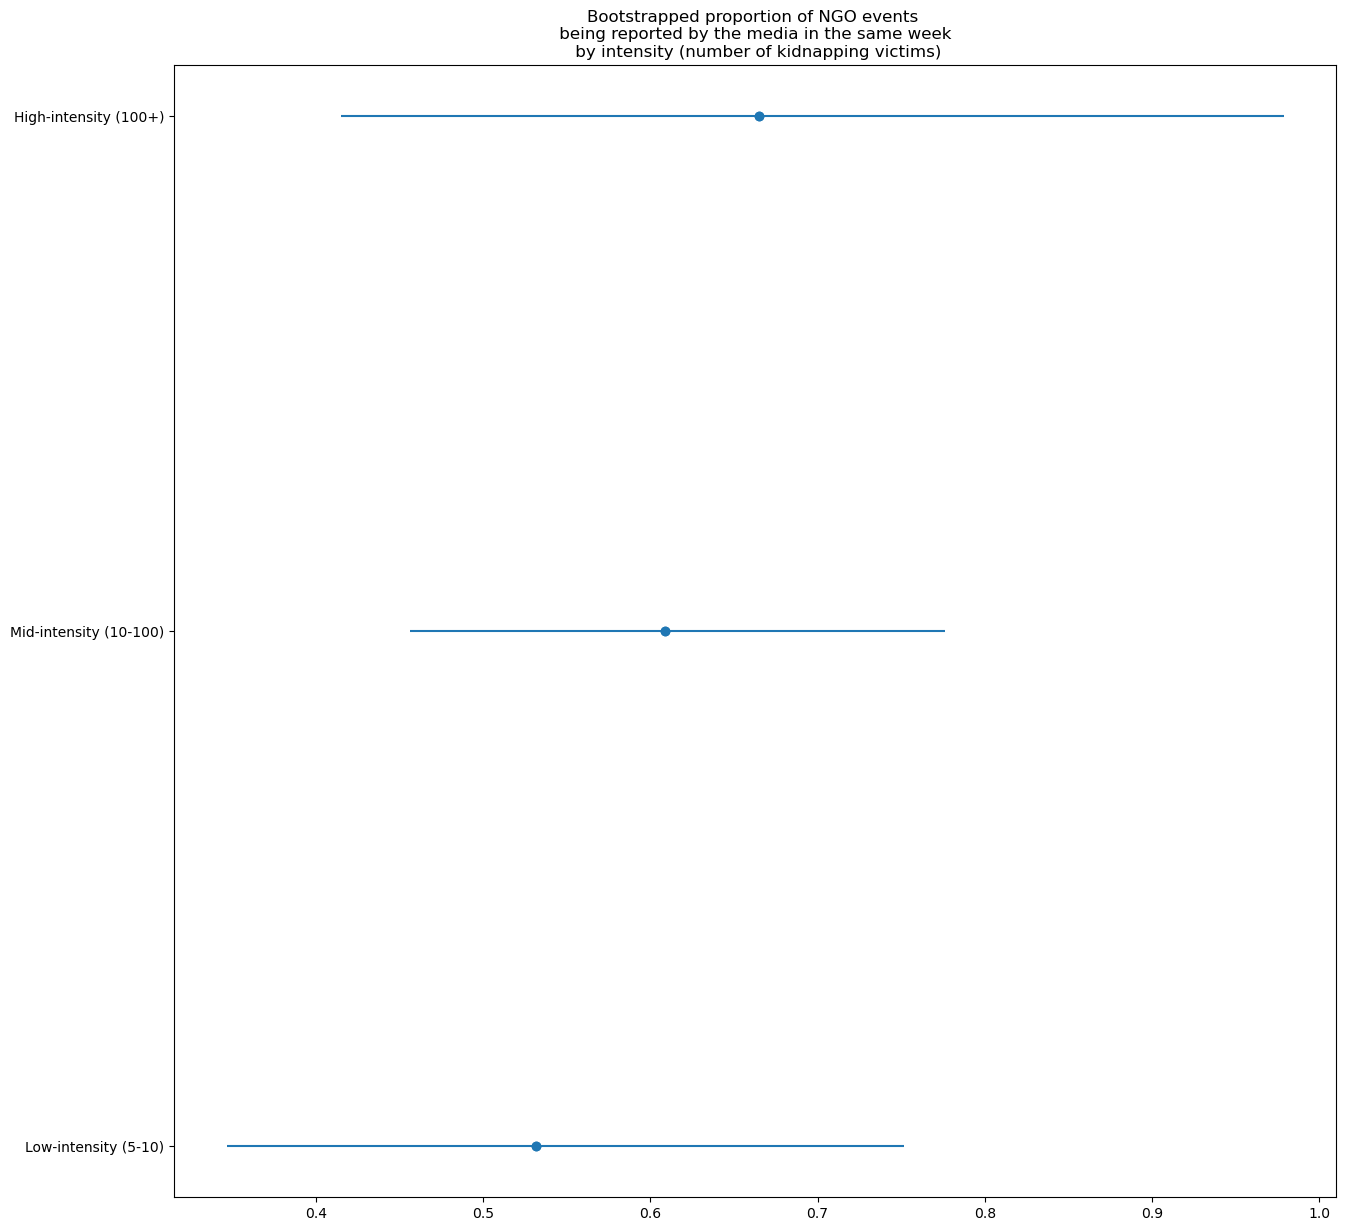

<Figure size 1500x1500 with 0 Axes>

In [84]:
merge_set_no_lag = bucket_compare(25,250)

print ()
print ('*'*24)
print ('Bootstrap Statistics')
print ('*'*24,'\n')

bootstrap_low, bootstrap_mid, bootstrap_high = bootstrap(merge_set_no_lag)

bootstrap_plot(
    bootstrap_low, bootstrap_mid, bootstrap_high,
    title='''Bootstrapped proportion of NGO events \n being reported by the media in the same week \n by intensity (number of kidnapping victims)''',
)

Equal thresholds at : [17, 99]
NGO set aggs :
 CASEQUANTITY    73923
low_ngo           169
mid_ngo           190
high_ngo          153
dtype: int64 


MEDIA set aggs :
 CASEQUANTITY    56899
low_media         117
mid_media         116
high_media        134
dtype: int64 


Merged :
************************
        CASEQUANTITY_n  low_ngo  mid_ngo  high_ngo  CASEQUANTITY  low_media  \
weekid                                                                        
1                 10.0      1.0      0.0       0.0           0.0        0.0   
4                 12.0      1.0      0.0       0.0           0.0        0.0   
14                 0.0      0.0      0.0       0.0           6.0        1.0   
24                35.0      0.0      1.0       0.0           0.0        0.0   
27                 0.0      0.0      0.0       0.0          11.0        1.0   

        mid_media  high_media  
weekid                         
1             0.0         0.0  
4             0.0         0.0  
14         

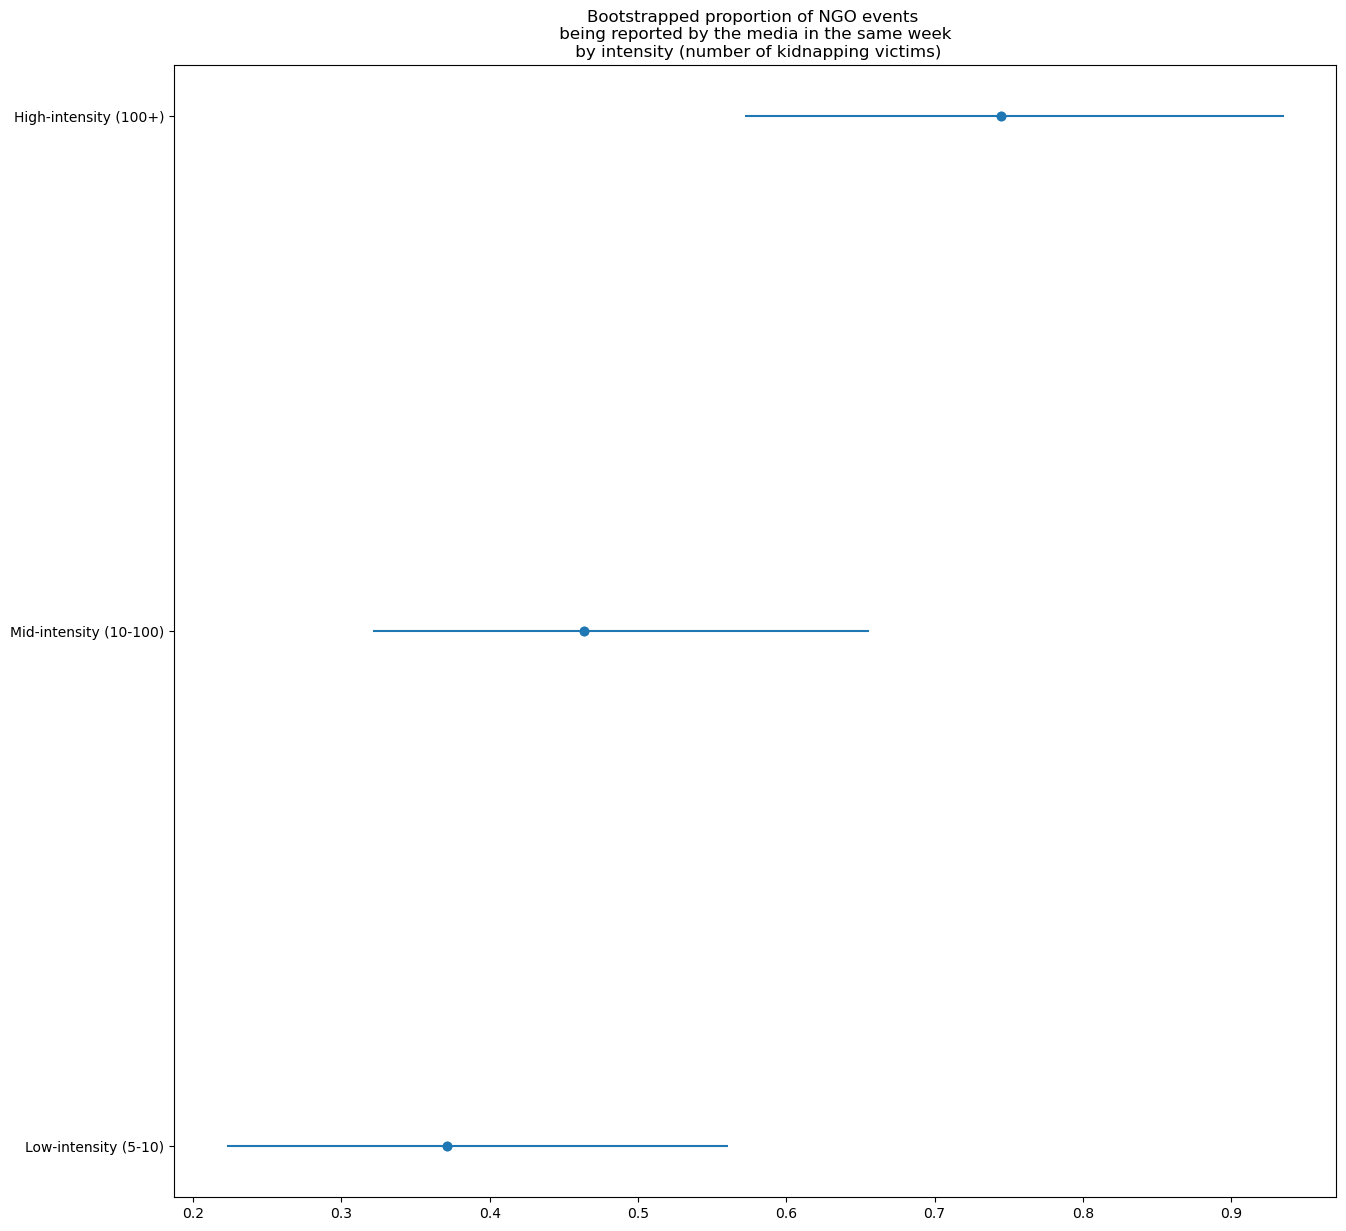

<Figure size 1500x1500 with 0 Axes>

In [85]:
split_arrays=np.array_split(media.CASEQUANTITY.sort_values().reset_index().CASEQUANTITY,3)
thresholds = [min(i)-1 for i in split_arrays][1:]
print('Equal thresholds at :', thresholds)
merge_set_no_lag = bucket_compare(*thresholds)

print ()
print ('*'*24)
print ('Bootstrap Statistics')
print ('*'*24,'\n')

bootstrap_low, bootstrap_mid, bootstrap_high = bootstrap(merge_set_no_lag)

bootstrap_plot(
    bootstrap_low, bootstrap_mid, bootstrap_high,
    title='''Bootstrapped proportion of NGO events \n being reported by the media in the same week \n by intensity (number of kidnapping victims)''',
)

In [86]:
    ngo_set = ngo[['CASEQUANTITY','weekid']]
    ngo_set['low_ngo'] = 0
    ngo_set['mid_ngo'] = 0
    ngo_set['high_ngo'] = 0

    ngo_set.loc[(ngo_set.CASEQUANTITY<10),'low_ngo'] = 1
    ngo_set.loc[(ngo_set.CASEQUANTITY>=10) & (ngo_set.CASEQUANTITY<100),'mid_ngo'] = 1
    ngo_set.loc[(ngo_set.CASEQUANTITY>=100),'high_ngo'] = 1
    ngo_set=ngo_set.groupby('weekid').agg('sum')


    media_set = media[['CASEQUANTITY','weekid']]
    media_set['low_media'] = 0
    media_set['mid_media'] = 0
    media_set['high_media'] = 0

    media_set.loc[(media_set.CASEQUANTITY<10),'low_media'] = 1
    media_set.loc[(media_set.CASEQUANTITY>=10) & (media_set.CASEQUANTITY<100),'mid_media'] = 1
    media_set.loc[(media_set.CASEQUANTITY>=100),'high_media'] = 1
    media_set=media_set.groupby('weekid').agg('sum')


In [87]:
media_set_lead1 = media_set.reset_index()
media_set_lead1['weekid']=media_set_lead1.weekid+1
media_set_lead1 = media_set_lead1.set_index('weekid')

In [88]:
media_set_lead1

,CASEQUANTITY,low_media,mid_media,high_media
weekid,,,,
15,6,1,0,0
28,11,0,1,0
32,8,1,0,0
39,100,0,0,1
42,5,1,0,0
...,...,...,...,...
256,12,2,0,0
258,50,0,1,0
259,667,0,7,1


In [89]:
media_set_lead1 = media_set_lead1.join(media_set,how='outer',lsuffix='_n').fillna(0)
media_set_lead1

,CASEQUANTITY_n,low_media_n,mid_media_n,high_media_n,CASEQUANTITY,low_media,mid_media,high_media
weekid,,,,,,,,
14,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0
15,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0
28,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
258,50.0,0.0,1.0,0.0,667.0,0.0,7.0,1.0
259,667.0,0.0,7.0,1.0,11.0,0.0,1.0,0.0
260,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [90]:
media_set_lead1['low_media'] = 0
media_set_lead1['mid_media'] = 0
media_set_lead1['high_media'] = 0
media_set_lead1['low_media_n'] = 0
media_set_lead1['mid_media_n'] = 0
media_set_lead1['high_media_n'] = 0



In [91]:

media_set_lead1.loc[(media_set_lead1.CASEQUANTITY<10),'low_media'] = 1
media_set_lead1.loc[(media_set_lead1.CASEQUANTITY>=10) & (media_set_lead1.CASEQUANTITY<100),'mid_media'] = 1
media_set_lead1.loc[(media_set_lead1.CASEQUANTITY>=100),'high_media'] = 1
media_set_lead1['low_media'] = media_set_lead1.low_media + media_set_lead1.low_media_n
media_set_lead1['mid_media'] = media_set_lead1.mid_media + media_set_lead1.mid_media_n
media_set_lead1['high_media'] = media_set_lead1.high_media + media_set_lead1.high_media_n

In [92]:
media_set_lead1.loc[(media_set_lead1.CASEQUANTITY_n<10),'low_media_n'] = 1
media_set_lead1.loc[(media_set_lead1.CASEQUANTITY_n>=10) & (media_set_lead1.CASEQUANTITY_n<100),'mid_media_n'] = 1
media_set_lead1.loc[(media_set_lead1.CASEQUANTITY_n>=100),'high_media_n'] = 1


In [93]:
media_set_lead1['low_media'] = media_set_lead1.low_media + media_set_lead1.low_media_n
media_set_lead1['mid_media'] = media_set_lead1.mid_media + media_set_lead1.mid_media_n
media_set_lead1['high_media'] = media_set_lead1.high_media + media_set_lead1.high_media_n

In [94]:
media_set_lead1[['low_media','mid_media','high_media']]

,low_media,mid_media,high_media
weekid,,,
14,2,0,0
15,2,0,0
27,1,1,0
28,1,1,0
31,2,0,0
...,...,...,...
258,0,1,1
259,0,1,1
260,1,1,0


In [95]:
merge_set_lag = ngo_set.join(media_set_lead1,how='outer',lsuffix='_n').fillna(0)

In [96]:
merge_set_lag['prop_low'] = merge_set_lag.low_media / merge_set_lag.low_ngo
merge_set_lag['prop_mid'] = merge_set_lag.mid_media / merge_set_lag.mid_ngo
merge_set_lag['prop_high'] = merge_set_lag.high_media / merge_set_lag.high_ngo
merge_set_lag = merge_set_lag.replace([np.inf, -np.inf], np.nan)

In [97]:
low_2 = merge_set_lag.prop_low.dropna()
mid_2 = merge_set_lag.prop_mid.dropna()
high_2 = merge_set_lag.prop_high.dropna()
low_2.mean(), mid_2.mean(), high_2.mean()

(0.2073170731707317, 0.2482319660537482, 0.7804444444444444)

In [98]:
np.random.seed(2049)

bootstrap_low = []
bootstrap_mid = []
bootstrap_high = []
for i in range(0,10000):
    b_low = low_2.sample(frac=1,replace=True).mean()
    b_mid = mid_2.sample(frac=1,replace=True).mean()
    b_high = high_2.sample(frac=1,replace=True).mean()
    bootstrap_low += [b_low]
    bootstrap_mid += [b_mid]
    bootstrap_high += [b_high]
bootstrap_low.sort()
bootstrap_mid.sort()
bootstrap_high.sort()
print(bootstrap_low[250],bootstrap_low[5000],bootstrap_low[9750])
print(bootstrap_mid[250],bootstrap_mid[5000],bootstrap_mid[9750])
print(bootstrap_high[250],bootstrap_high[5000],bootstrap_high[9750])

0.0975609756097561 0.2073170731707317 0.32926829268292684
0.17138142385667138 0.24752475247524752 0.33074021687883076
0.6417777777777778 0.7786666666666666 0.9248888888888888


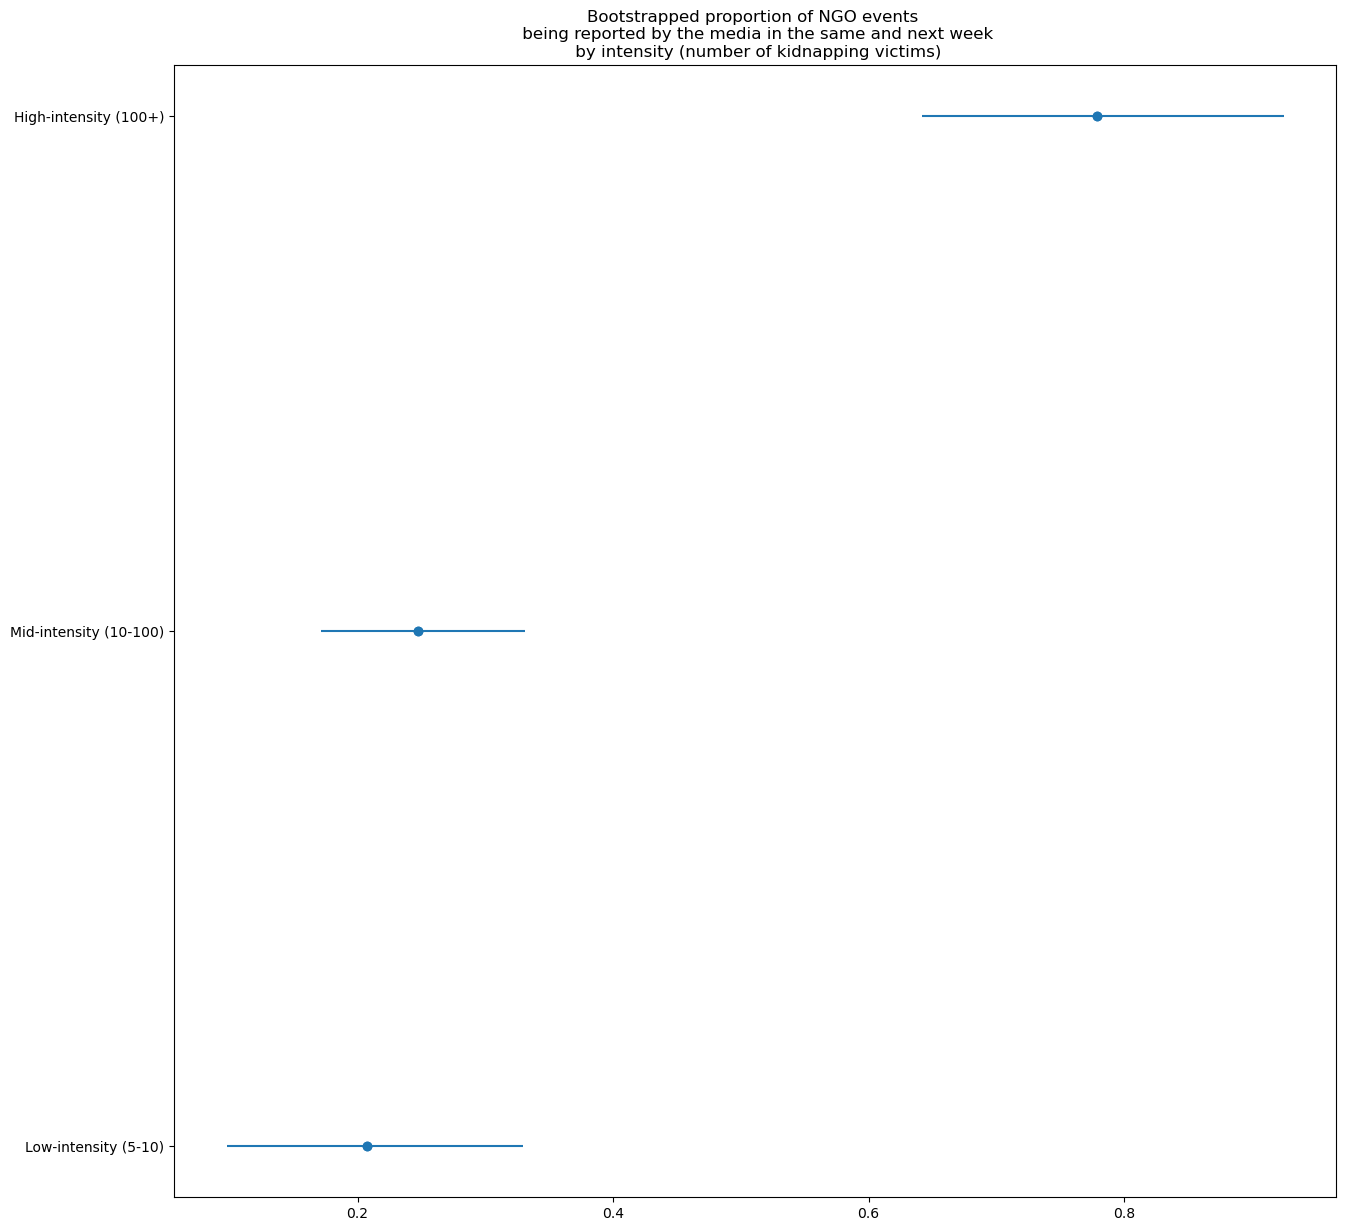

In [99]:
y_axes = ['Low-intensity (5-10)','Mid-intensity (10-100)','High-intensity (100+)'] 
mid = (bootstrap_low[5000],bootstrap_mid[5000],bootstrap_high[5000])
err_low = (bootstrap_low[5000]-bootstrap_low[250],
       bootstrap_mid[5000]-bootstrap_mid[250],
       bootstrap_high[5000]-bootstrap_high[250])
err_high = (bootstrap_low[9750]-bootstrap_low[5000],
       bootstrap_mid[9750]-bootstrap_mid[5000],
       bootstrap_high[9750]-bootstrap_high[5000])
err = [err_low,err_high]
plt.scatter(mid,y_axes)
plt.errorbar(mid,y_axes,xerr=err,fmt="o")
plt.title('Bootstrapped proportion of NGO events \n being reported by the media in the same and next week\n by intensity (number of kidnapping victims)')
plt.savefig('plt_a2.png')
plt.show()

In [100]:
with_vdc = ngo.VDCMCP.isnull().sum()+(ngo.VDCMCP==' ').sum()
with_any = ngo.shape[0]
with_vdc, with_any, with_vdc/with_any

(334, 512, 0.65234375)

In [101]:
end_time = time.time()
print('Runtime in seconds:', end_time - start_time)

print("Done")

Runtime in seconds: 57.59934425354004
Done
